In [ ]:
pip install matplotlib seaborn pandas

In [ ]:
pip install imbalanced-learn

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import missingno as msno
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
from imblearn.over_sampling import SMOTE
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster, linkage
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
path ="/content/drive/MyDrive/botnet_dataset/SimpleHome_XCS7_1002_WHT_Security_Camera.csv"
df=pd.read_csv(path)
df.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000       60.000000            0.000000          1.000000   
1          1.000000      322.000000            0.000000          1.000000   
2          1.920484      328.248423           35.938286          1.951502   
3          1.000000       60.000000            0.000000          1.000000   
4          1.973903       71.145433          120.978849          1.984259   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0       60.000000            0.000000          1.000000       60.000000   
1      322.000000            0.000000          1.000000      322.000000   
2      328.149109           35.977767          1.983566      328.049712   
3       60.000000            0.000000          1.000000       60.000000   
4       71.087263          120.992385          1.994725       71.029088   

   MI_dir_L1_variance  H_L5_weight  ...  HpHp_L3_weight  HpHp_L3_mean  \
0            0.000000     1.000000  ...        1.000000     60.000000   
1            0.000000     1.000000  ...        1.000058    322.001162   
2           35.997529     1.920485  ...        1.951558    328.149501   
3            0.000000     1.000000  ...        1.000000     60.000000   
4          120.999154     1.973903  ...        1.000000     82.000000   

   HpHp_L3_std  HpHp_L3_covariance  HpHp_L3_pcc  HpHp_L1_weight  HpHp_L1_mean  \
0     0.000000                 0.0          0.0        1.000000     60.000000   
1     0.152442                 0.0          0.0        1.038732    322.745757   
2     5.998515                 0.0          0.0        2.021661    328.312587   
3     0.000000                 0.0          0.0        1.000000     60.000000   
4     0.000000                 0.0          0.0        1.000000     82.000000   

   HpHp_L1_std  HpHp_L1_covariance  HpHp_L1_pcc  
0     0.000000                 0.0          0.0  
1     3.789325                 0.0          0.0  
2     6.238371                 0.0          0.0  
3     0.000000                 0.0          0.0  
4     0.000000                 0.0          0.0  

[5 rows x 57 columns]

In [ ]:
print(df.columns)

Index(['MI_dir_L5_weight', 'MI_dir_L5_mean', 'MI_dir_L5_variance',
       'MI_dir_L3_weight', 'MI_dir_L3_mean', 'MI_dir_L3_variance',
       'MI_dir_L1_weight', 'MI_dir_L1_mean', 'MI_dir_L1_variance',
       'H_L5_weight', 'H_L5_mean', 'H_L5_variance', 'H_L3_weight', 'H_L3_mean',
       'H_L3_variance', 'H_L1_weight', 'H_L1_mean', 'H_L1_variance',
       'HH_L5_weight', 'HH_L5_mean', 'HH_L5_std', 'HH_L5_covariance',
       'HH_L5_pcc', 'HH_L3_weight', 'HH_L3_mean', 'HH_L3_std',
       'HH_L3_covariance', 'HH_L3_pcc', 'HH_L1_weight', 'HH_L1_mean',
       'HH_L1_std', 'HH_L1_covariance', 'HH_L1_pcc', 'HH_jit_L5_weight',
       'HH_jit_L5_mean', 'HH_jit_L5_variance', 'HH_jit_L3_weight',
       'HH_jit_L3_mean', 'HH_jit_L3_variance', 'HH_jit_L1_weight',
       'HH_jit_L1_mean', 'HH_jit_L1_variance', 'HpHp_L5_weight',
       'HpHp_L5_mean', 'HpHp_L5_std', 'HpHp_L5_covariance', 'HpHp_L5_pcc',
       'HpHp_L3_weight', 'HpHp_L3_mean', 'HpHp_L3_std', 'HpHp_L3_covariance',
       'HpHp_L3_pcc', 

In [ ]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
MI_dir_L5_weight      0
MI_dir_L5_mean        0
MI_dir_L5_variance    0
MI_dir_L3_weight      0
MI_dir_L3_mean        0
MI_dir_L3_variance    0
MI_dir_L1_weight      0
MI_dir_L1_mean        0
MI_dir_L1_variance    0
H_L5_weight           0
H_L5_mean             0
H_L5_variance         0
H_L3_weight           0
H_L3_mean             0
H_L3_variance         0
H_L1_weight           0
H_L1_mean             0
H_L1_variance         0
HH_L5_weight          0
HH_L5_mean            0
HH_L5_std             0
HH_L5_covariance      0
HH_L5_pcc             0
HH_L3_weight          0
HH_L3_mean            0
HH_L3_std             0
HH_L3_covariance      0
HH_L3_pcc             0
HH_L1_weight          0
HH_L1_mean            0
HH_L1_std             0
HH_L1_covariance      0
HH_L1_pcc             0
HH_jit_L5_weight      0
HH_jit_L5_mean        0
HH_jit_L5_variance    0
HH_jit_L3_weight      0
HH_jit_L3_mean        0
HH_jit_L3_variance    0
HH_jit_L1_weight      0
HH_jit_L1_mean        0

Null values in DataFrame:
       MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0                 False           False               False             False   
1                 False           False               False             False   
2                 False           False               False             False   
3                 False           False               False             False   
4                 False           False               False             False   
...                 ...             ...                 ...               ...   
46580             False           False               False             False   
46581             False           False               False             False   
46582             False           False               False             False   
46583             False           False               False             False   
46584             False           False               False             False   

 

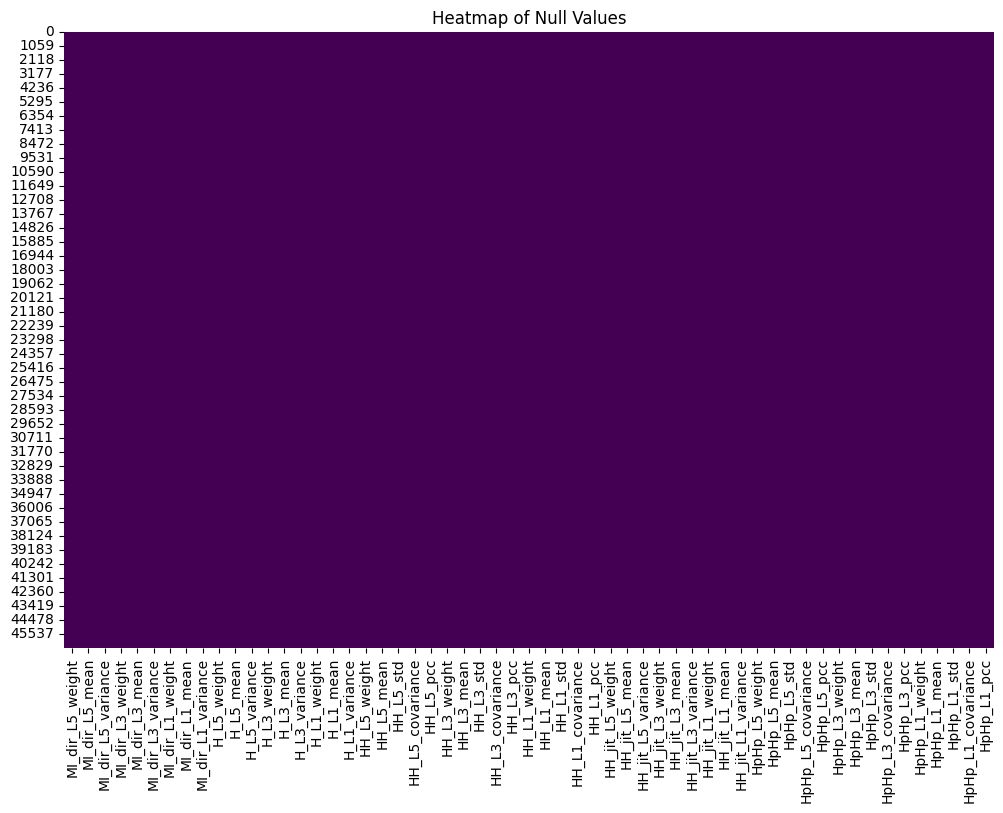

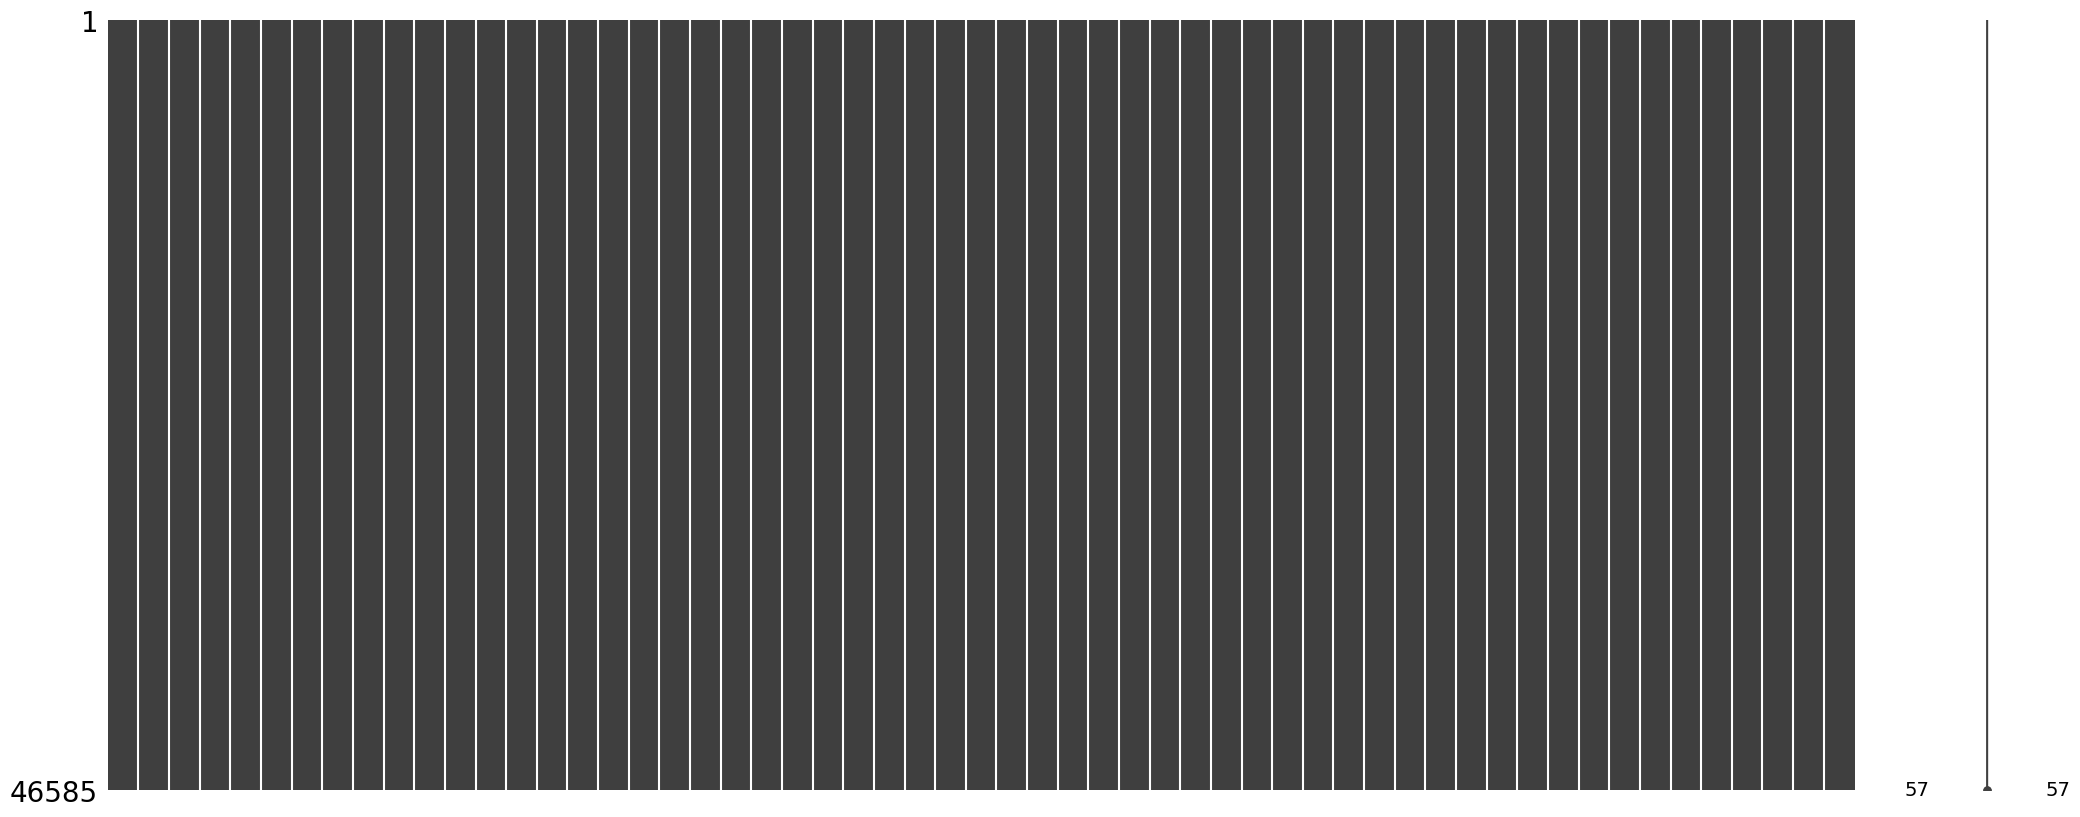

In [ ]:
# Check for null values
print("Null values in DataFrame:")
print(df.isnull())

# Count null values per column
print("\nCount of null values per column:")
print(df.isnull().sum())

# Display rows with null values
print("\nRows with null values:")
print(df[df.isnull().any(axis=1)])

# Visualize null values with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Null Values')
plt.show()

# Visualize missing values matrix
msno.matrix(df)
plt.show()

In [ ]:
data_types = df.dtypes
print("Data types of each column:")
print(data_types)

Data types of each column:
MI_dir_L5_weight      float64
MI_dir_L5_mean        float64
MI_dir_L5_variance    float64
MI_dir_L3_weight      float64
MI_dir_L3_mean        float64
MI_dir_L3_variance    float64
MI_dir_L1_weight      float64
MI_dir_L1_mean        float64
MI_dir_L1_variance    float64
H_L5_weight           float64
H_L5_mean             float64
H_L5_variance         float64
H_L3_weight           float64
H_L3_mean             float64
H_L3_variance         float64
H_L1_weight           float64
H_L1_mean             float64
H_L1_variance         float64
HH_L5_weight          float64
HH_L5_mean            float64
HH_L5_std             float64
HH_L5_covariance      float64
HH_L5_pcc             float64
HH_L3_weight          float64
HH_L3_mean            float64
HH_L3_std             float64
HH_L3_covariance      float64
HH_L3_pcc             float64
HH_L1_weight          float64
HH_L1_mean            float64
HH_L1_std             float64
HH_L1_covariance      float64
HH_L1_pcc    

In [ ]:
max_values = df.max()
min_values = df.min()

print("Maximum values for each feature:")
print(max_values)

print("\nMinimum values for each feature:")
print(min_values)

Maximum values for each feature:
MI_dir_L5_weight      2.340560e+02
MI_dir_L5_mean        5.090000e+02
MI_dir_L5_variance    6.085762e+04
MI_dir_L3_weight      2.876105e+02
MI_dir_L3_mean        5.090000e+02
MI_dir_L3_variance    5.643966e+04
MI_dir_L1_weight      4.482116e+02
MI_dir_L1_mean        5.089962e+02
MI_dir_L1_variance    5.023114e+04
H_L5_weight           2.340560e+02
H_L5_mean             5.090000e+02
H_L5_variance         6.085762e+04
H_L3_weight           2.876105e+02
H_L3_mean             5.090000e+02
H_L3_variance         5.643966e+04
H_L1_weight           4.482116e+02
H_L1_mean             5.089962e+02
H_L1_variance         5.023114e+04
HH_L5_weight          2.255603e+02
HH_L5_mean            5.090000e+02
HH_L5_std             2.466934e+02
HH_L5_covariance      2.026437e+03
HH_L5_pcc             2.002652e+00
HH_L3_weight          2.753971e+02
HH_L3_mean            5.090000e+02
HH_L3_std             2.375703e+02
HH_L3_covariance      4.133639e+03
HH_L3_pcc             

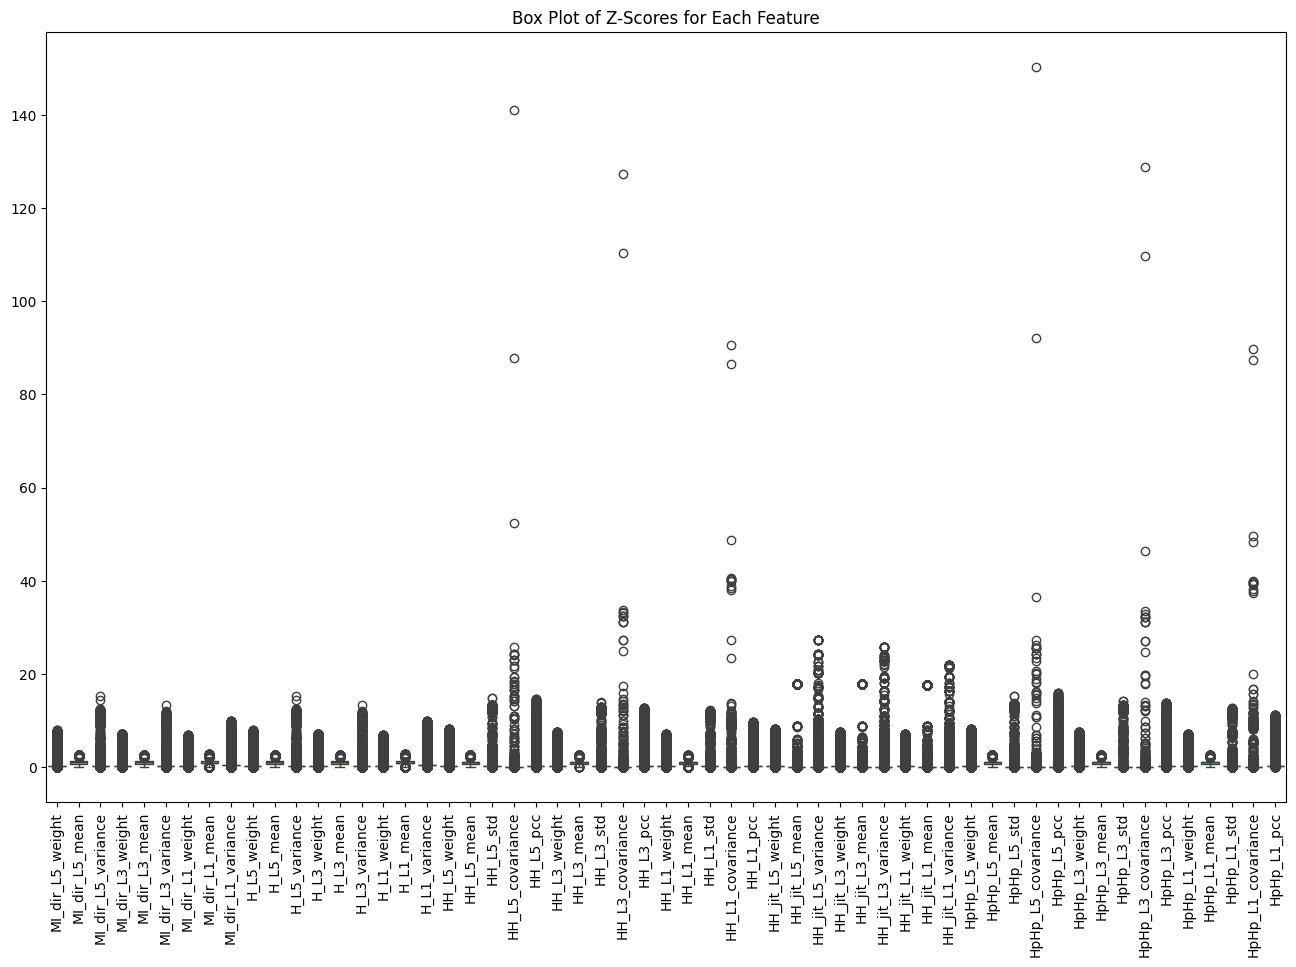

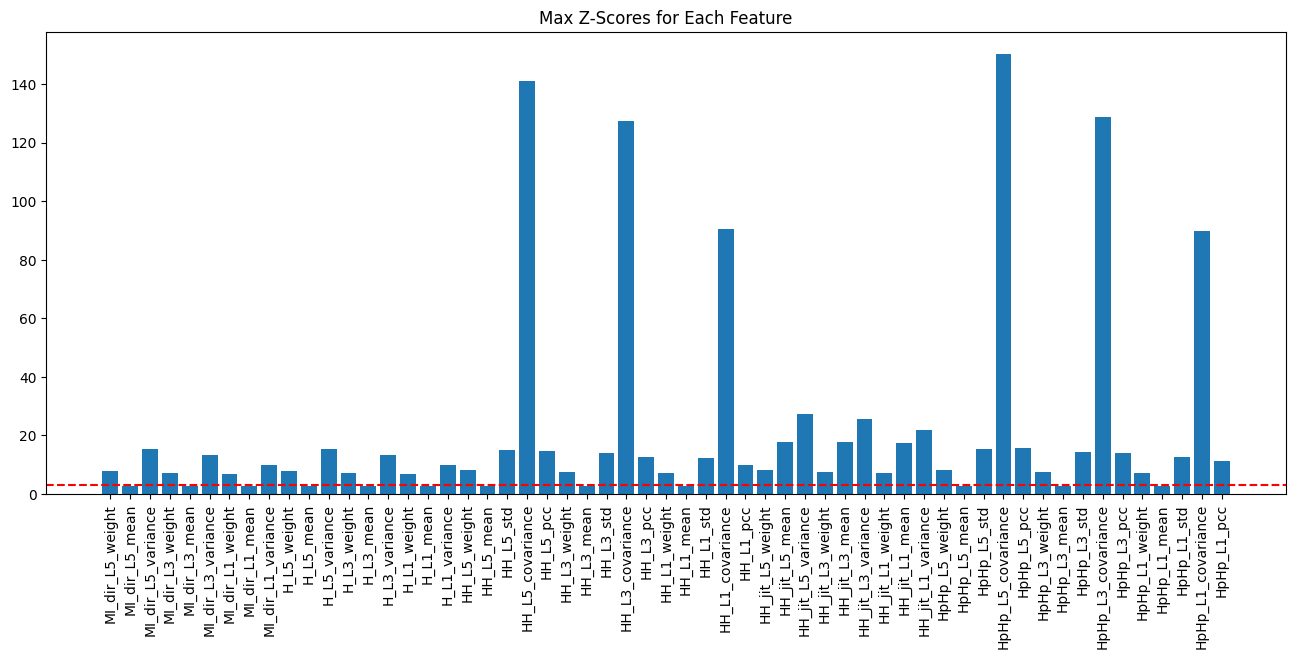

In [ ]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
z_scores_df = pd.DataFrame(z_scores, columns=df.select_dtypes(include=[np.number]).columns)
z_scores_df.head()
# Create a box plot for all features
plt.figure(figsize=(16, 10))  # Adjust the size depending on the number of features
sns.boxplot(data=z_scores_df)
plt.xticks(rotation=90)  # Rotate feature names if necessary
plt.title('Box Plot of Z-Scores for Each Feature')
plt.show()
# Calculate max Z-score for each feature
max_z_scores = z_scores_df.max()

# Plot the max Z-scores for each feature
plt.figure(figsize=(16, 6))
plt.bar(max_z_scores.index, max_z_scores.values)
plt.axhline(y=3, color='r', linestyle='--')  # Outlier threshold
plt.xticks(rotation=90)
plt.title('Max Z-Scores for Each Feature')
plt.show()

In [ ]:
threshold = 3

# Identify outliers for each feature
outliers = (z_scores_df > threshold)

# Display the rows and features that are outliers
outliers_summary = df[outliers.any(axis=1)]
print(f"Number of rows with outliers: {outliers_summary.shape[0]}")

# Display the first few rows with outliers
outliers_summary.head()

Number of rows with outliers: 3949


MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000       60.000000            0.000000          1.000000   
3          1.000000       60.000000            0.000000          1.000000   
4          1.973903       71.145433          120.978849          1.984259   
5          2.969147       74.801219          106.550734          2.981389   
6          3.948627       76.624329           89.366926          3.969009   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0       60.000000            0.000000          1.000000       60.000000   
3       60.000000            0.000000          1.000000       60.000000   
4       71.087263          120.992385          1.994725       71.029088   
5       74.747549          106.955877          2.993763       74.693677   
6       76.574819           89.921396          3.989614       76.525013   

   MI_dir_L1_variance  H_L5_weight  ...  HpHp_L3_weight  HpHp_L3_mean  \
0            0.000000     1.000000  ...             1.0          60.0   
3            0.000000     1.000000  ...             1.0          60.0   
4          120.999154     1.973903  ...             1.0          82.0   
5          107.356748     2.969147  ...             1.0          82.0   
6           90.474229     3.948627  ...             1.0          82.0   

   HpHp_L3_std  HpHp_L3_covariance  HpHp_L3_pcc  HpHp_L1_weight  HpHp_L1_mean  \
0          0.0                 0.0          0.0             1.0          60.0   
3          0.0                 0.0          0.0             1.0          60.0   
4          0.0                 0.0          0.0             1.0          82.0   
5          0.0                 0.0          0.0             1.0          82.0   
6          0.0                 0.0          0.0             1.0          82.0   

   HpHp_L1_std  HpHp_L1_covariance  HpHp_L1_pcc  
0          0.0                 0.0          0.0  
3          0.0                 0.0          0.0  
4          0.0                 0.0          0.0  
5          0.0                 0.0          0.0  
6          0.0                 0.0          0.0  

[5 rows x 57 columns]

In [ ]:
# Count of outliers per feature
outlier_counts_per_feature = outliers.sum()

# Print the number of outliers per feature
print("Number of outliers per feature:")
print(outlier_counts_per_feature)

Number of outliers per feature:
MI_dir_L5_weight      1389
MI_dir_L5_mean           0
MI_dir_L5_variance     828
MI_dir_L3_weight      1433
MI_dir_L3_mean           0
MI_dir_L3_variance     764
MI_dir_L1_weight      1435
MI_dir_L1_mean           0
MI_dir_L1_variance     632
H_L5_weight           1389
H_L5_mean                0
H_L5_variance          828
H_L3_weight           1433
H_L3_mean                0
H_L3_variance          764
H_L1_weight           1435
H_L1_mean                0
H_L1_variance          632
HH_L5_weight          1237
HH_L5_mean               0
HH_L5_std              355
HH_L5_covariance        62
HH_L5_pcc              972
HH_L3_weight          1286
HH_L3_mean               0
HH_L3_std              388
HH_L3_covariance        64
HH_L3_pcc              632
HH_L1_weight          1347
HH_L1_mean               0
HH_L1_std              399
HH_L1_covariance       141
HH_L1_pcc              619
HH_jit_L5_weight      1237
HH_jit_L5_mean         198
HH_jit_L5_variance     

Number of outliers per feature:
MI_dir_L5_weight      1389
MI_dir_L5_mean           0
MI_dir_L5_variance     828
MI_dir_L3_weight      1433
MI_dir_L3_mean           0
MI_dir_L3_variance     764
MI_dir_L1_weight      1435
MI_dir_L1_mean           0
MI_dir_L1_variance     632
H_L5_weight           1389
H_L5_mean                0
H_L5_variance          828
H_L3_weight           1433
H_L3_mean                0
H_L3_variance          764
H_L1_weight           1435
H_L1_mean                0
H_L1_variance          632
HH_L5_weight          1237
HH_L5_mean               0
HH_L5_std              355
HH_L5_covariance        62
HH_L5_pcc              972
HH_L3_weight          1286
HH_L3_mean               0
HH_L3_std              388
HH_L3_covariance        64
HH_L3_pcc              632
HH_L1_weight          1347
HH_L1_mean               0
HH_L1_std              399
HH_L1_covariance       141
HH_L1_pcc              619
HH_jit_L5_weight      1237
HH_jit_L5_mean         198
HH_jit_L5_variance     

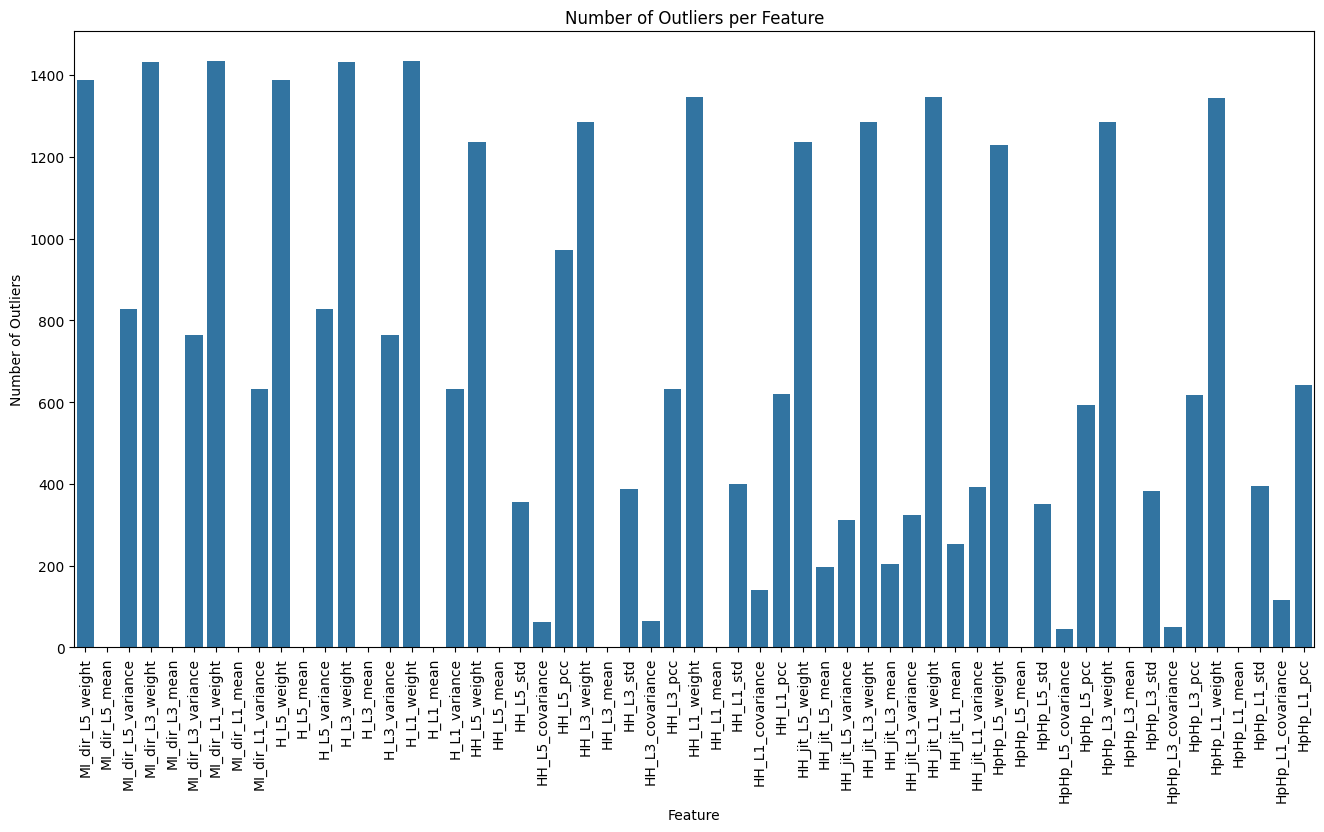

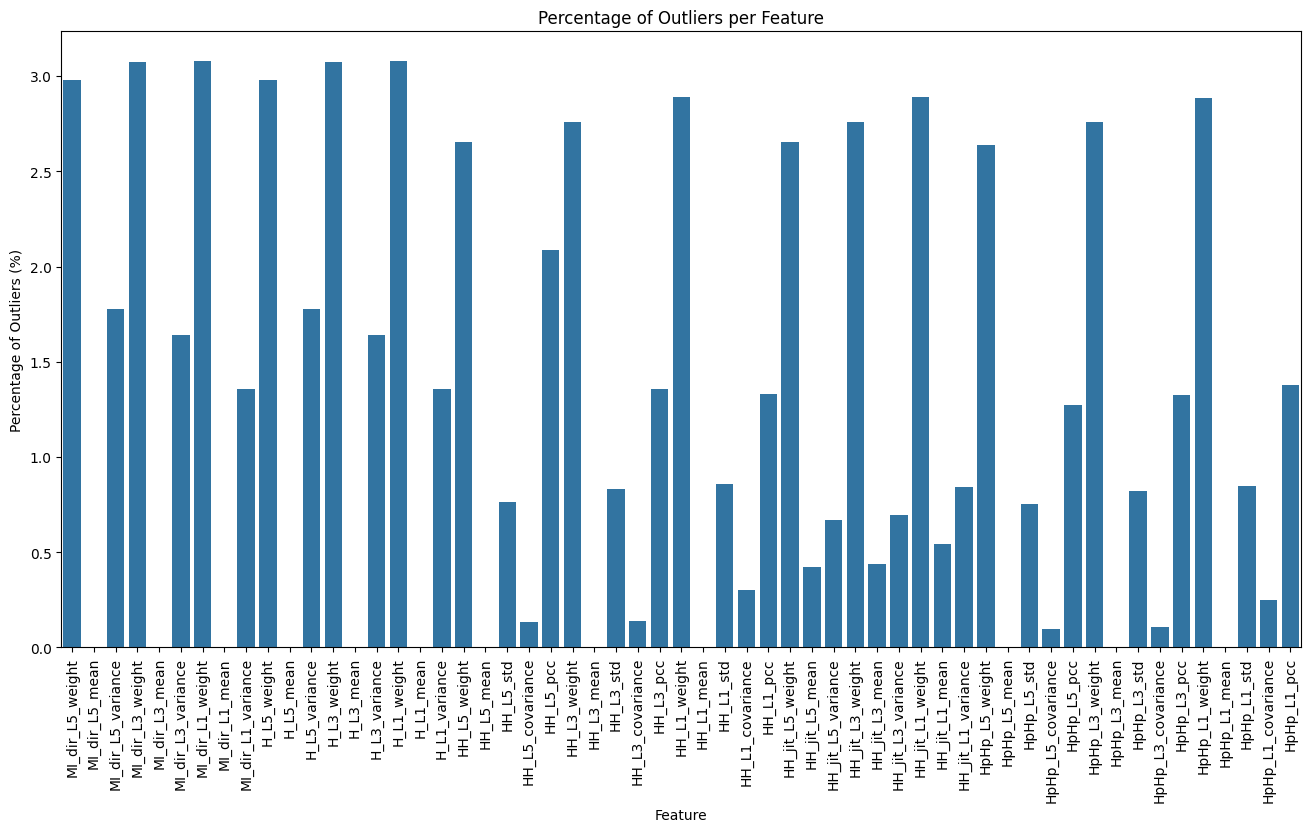

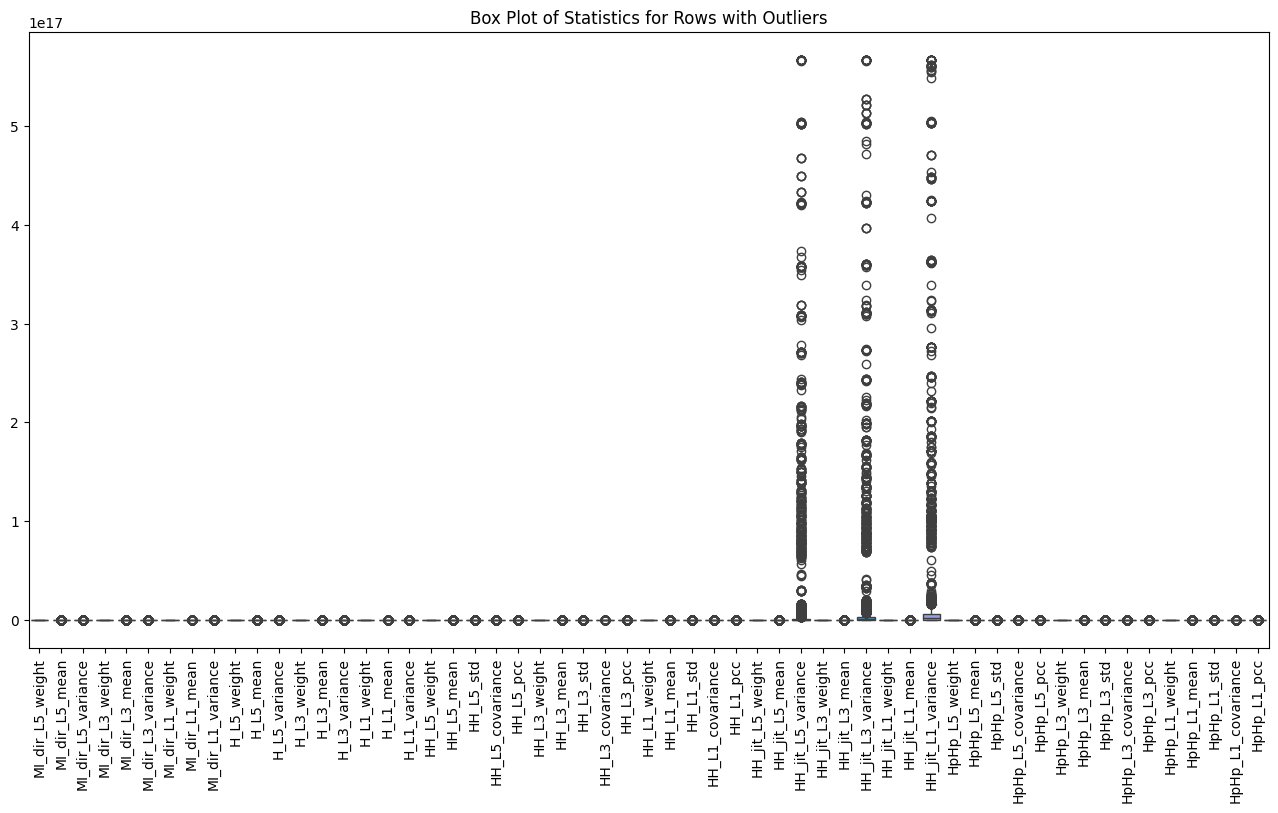

In [ ]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
z_scores_df = pd.DataFrame(z_scores, columns=df.select_dtypes(include=[np.number]).columns)

# Define threshold
threshold = 3

# Identify outliers
outliers = (z_scores_df > threshold)

# Summary of outliers
outliers_summary = df[outliers.any(axis=1)]

# Aggregate statistics for outliers
outlier_counts_per_feature = outliers.sum()
outlier_percentage_per_feature = (outlier_counts_per_feature / df.shape[0]) * 100
outliers_summary_stats = outliers_summary.describe()

# Print outlier counts and percentages
print("Number of outliers per feature:")
print(outlier_counts_per_feature)

print("\nPercentage of outliers per feature:")
print(outlier_percentage_per_feature)

print("\nAggregated statistics for rows with outliers:")
print(outliers_summary_stats)

# Visualize number of outliers per feature
plt.figure(figsize=(16, 8))
sns.barplot(x=outlier_counts_per_feature.index, y=outlier_counts_per_feature.values)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers per Feature')
plt.show()

# Visualize percentage of outliers per feature
plt.figure(figsize=(16, 8))
sns.barplot(x=outlier_percentage_per_feature.index, y=outlier_percentage_per_feature.values)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Percentage of Outliers (%)')
plt.title('Percentage of Outliers per Feature')
plt.show()

# Visualize summary statistics for rows with outliers
plt.figure(figsize=(16, 8))
sns.boxplot(data=outliers_summary)
plt.xticks(rotation=90)
plt.title('Box Plot of Statistics for Rows with Outliers')
plt.show()

In [ ]:
# Remove rows with any outliers
df_cleaned = df[~outliers.any(axis=1)]
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

# Check the first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
print(df_cleaned.head())
print("\nSummary statistics of the cleaned dataset:")
print(df_cleaned.describe())

Original dataset shape: (46585, 57)
Cleaned dataset shape: (42636, 57)

First few rows of the cleaned dataset:
    MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
1           1.000000      322.000000            0.000000          1.000000   
2           1.920484      328.248423           35.938286          1.951502   
22          1.000001       60.000256            0.077970          1.000854   
23          1.011270       72.855125            1.863216          1.067846   
25          1.015645       97.778770            4.195717          1.110780   

    MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
1       322.000000            0.000000          1.000000      322.000000   
2       328.149109           35.977767          1.983566      328.049712   
22       60.134744           39.827771          1.647608      105.562265   
23       72.182598           12.378416          1.671798       86.084875   
25       96.427505           30.644673  

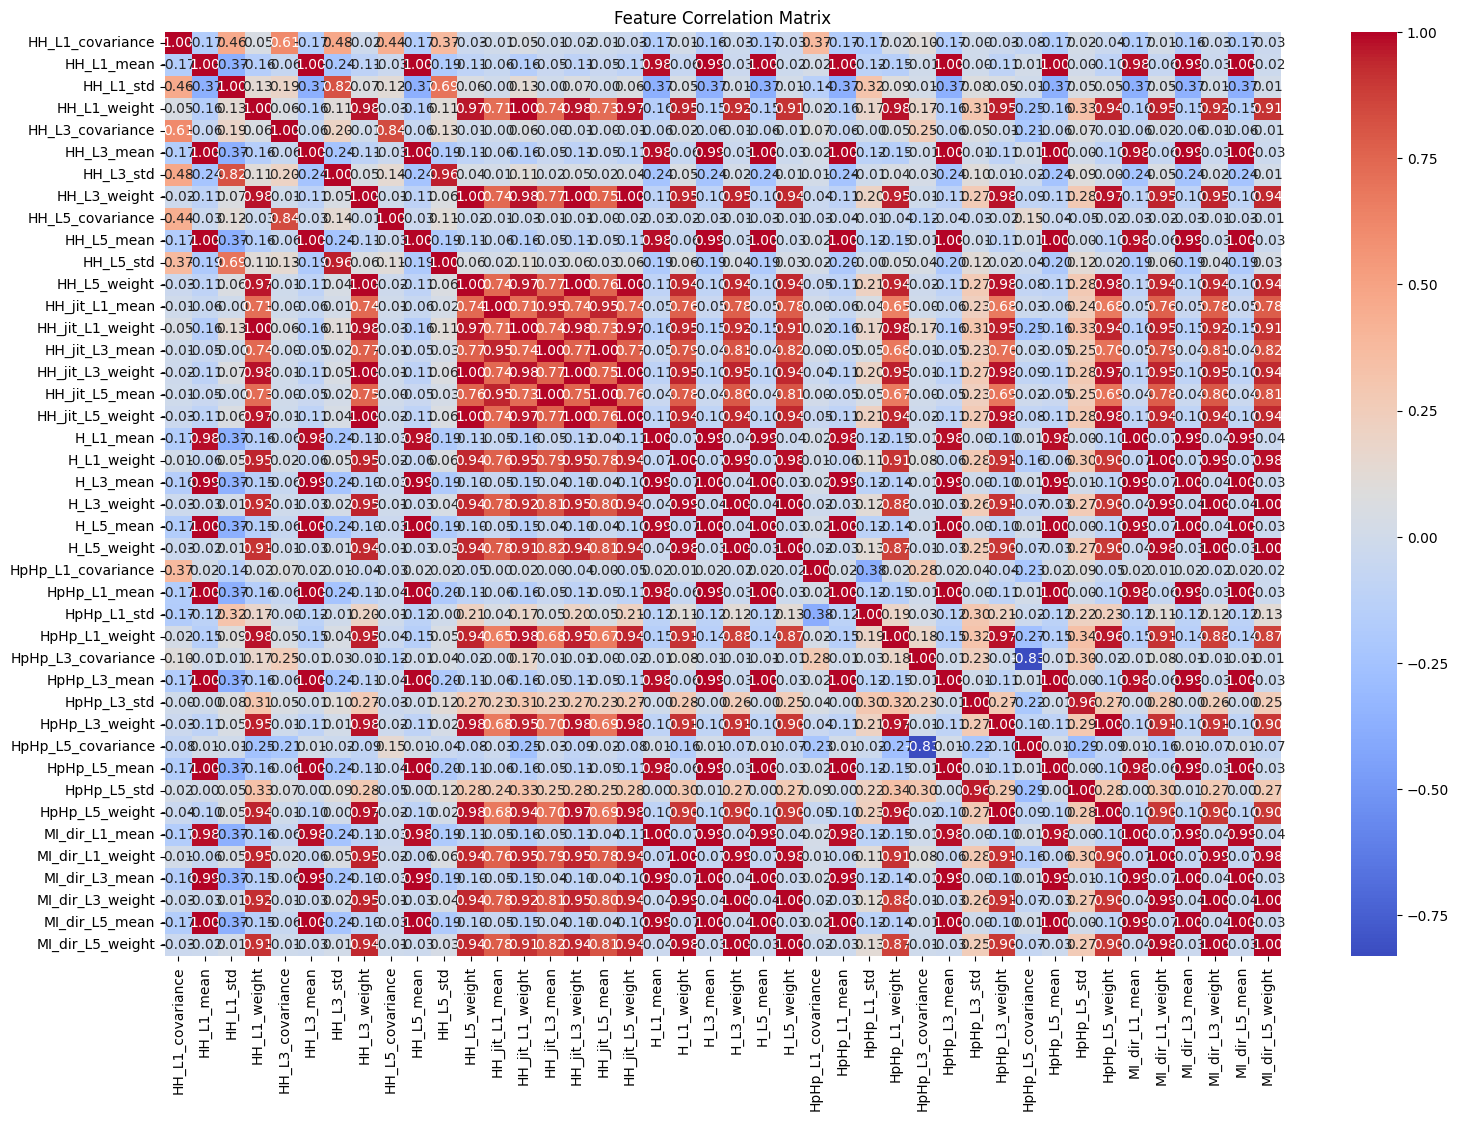

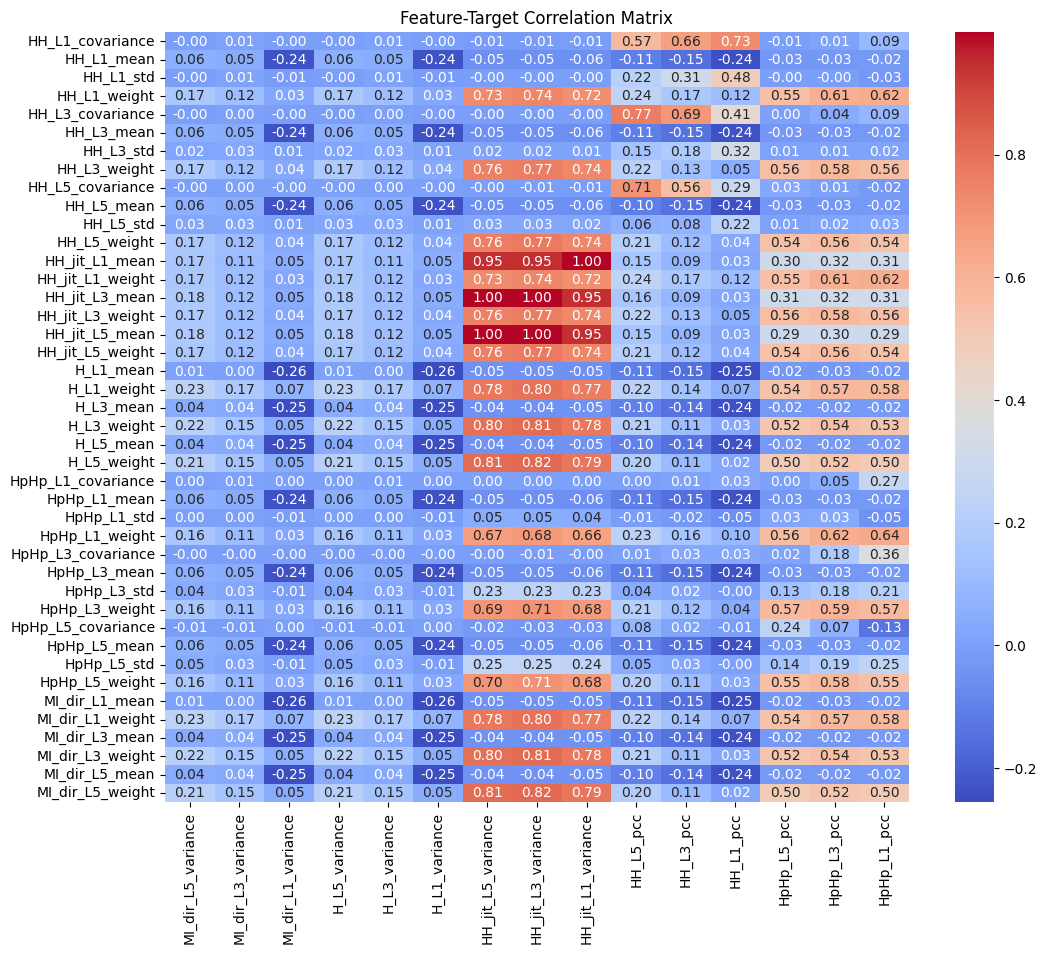

Descriptive Statistics for Features:
       HH_L1_covariance    HH_L1_mean     HH_L1_std  HH_L1_weight  \
count      4.263600e+04  42636.000000  42636.000000  42636.000000   
mean       5.071330e+00    188.972830      2.278638      1.654983   
std        2.380987e+01    124.786664      4.917071      3.432177   
min       -5.238823e+02     60.000000      0.000000      1.000000   
25%      -6.042500e-158     78.713654      0.000000      1.000000   
50%        2.165000e-66     97.999760      0.000005      1.000000   
75%        1.370000e-08    330.000000      0.690632      1.888157   
max        3.722063e+02    509.000000     49.612797     95.291154   

       HH_L3_covariance    HH_L3_mean     HH_L3_std  HH_L3_weight  \
count      4.263600e+04  42636.000000  42636.000000  42636.000000   
mean       6.764679e-01    189.046345      1.027932      1.371993   
std        9.273178e+00    124.777778      3.420809      2.931750   
min       -1.449399e+02     60.000000      0.000000      1.000000

In [ ]:
# Define target columns
target_columns = [
    'MI_dir_L5_variance', 'MI_dir_L3_variance', 'MI_dir_L1_variance', 'H_L5_variance', 'H_L3_variance', 'H_L1_variance',
    'HH_jit_L5_variance', 'HH_jit_L3_variance', 'HH_jit_L1_variance', 'HH_L5_pcc',
    'HH_L3_pcc', 'HH_L1_pcc', 'HpHp_L5_pcc', 'HpHp_L3_pcc', 'HpHp_L1_pcc'
]

# Extract feature columns (excluding target columns)
feature_columns = df_cleaned.columns.difference(target_columns)

# Extract features and targets
X = df_cleaned[feature_columns]
y = df_cleaned[target_columns]

# Compute correlation matrix for features
feature_correlation_matrix = X.corr()

# Plot the correlation matrix for features
plt.figure(figsize=(18, 12))
sns.heatmap(feature_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# Compute correlation matrix for features with each target variable
target_correlation_matrix = pd.DataFrame({target: X.corrwith(df_cleaned[target]) for target in target_columns})

# Plot the correlation matrix for features with each target variable
plt.figure(figsize=(12, 10))
sns.heatmap(target_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature-Target Correlation Matrix')
plt.show()

# Descriptive statistics for features
print("Descriptive Statistics for Features:")
print(X.describe())

# Descriptive statistics for target variables
print("\nDescriptive Statistics for Target Variables:")
print(y.describe())


In [ ]:
# Define features
target_columns = [
                     'MI_dir_L5_variance', 'MI_dir_L3_variance', 'MI_dir_L1_variance', 'H_L5_variance', 'H_L3_variance', 'H_L1_variance',
    'HH_jit_L5_variance', 'HH_jit_L3_variance', 'HH_jit_L1_variance', 'HH_L5_pcc',
    'HH_L3_pcc', 'HH_L1_pcc', 'HpHp_L5_pcc', 'HpHp_L3_pcc', 'HpHp_L1_pcc'
]
feature_columns = df.columns.difference(target_columns)

X = df_cleaned[feature_columns]

# Compute the correlation matrix for features
correlation_matrix = X.corr()
# Define the threshold for highly correlated features
high_corr_threshold = 3
# Extract pairs of highly correlated features
def get_highly_correlated_features(corr_matrix, threshold):
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    return corr_pairs

high_corr_pairs = get_highly_correlated_features(correlation_matrix, high_corr_threshold)

# Print the highly correlated pairs
print("Highly Correlated Features (Correlation > 3):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

Highly Correlated Features (Correlation > 3):


Distance Matrix:
                    HH_L1_covariance  HH_L1_mean  HH_L1_std  HH_L1_weight  \
HH_L1_covariance            0.000000    1.167340   0.540660      0.952057   
HH_L1_mean                  1.167340    0.000000   1.367270      1.157562   
HH_L1_std                   0.540660    1.367270   0.000000      0.868906   
HH_L1_weight                0.952057    1.157562   0.868906      0.000000   
HH_L3_covariance            0.390082    1.058727   0.809241      0.944583   
HH_L3_mean                  1.166825    0.000122   1.368729      1.157541   
HH_L3_std                   0.524354    1.237097   0.179438      0.893288   
HH_L3_weight                1.020101    1.109876   0.932595      0.024767   
HH_L5_covariance            0.559868    1.032552   0.882572      1.028549   
HH_L5_mean                  1.166490    0.000203   1.368391      1.157535   
HH_L5_std                   0.625808    1.188842   0.306108      0.889231   
HH_L5_weight                1.030813    1.105855   0.938358

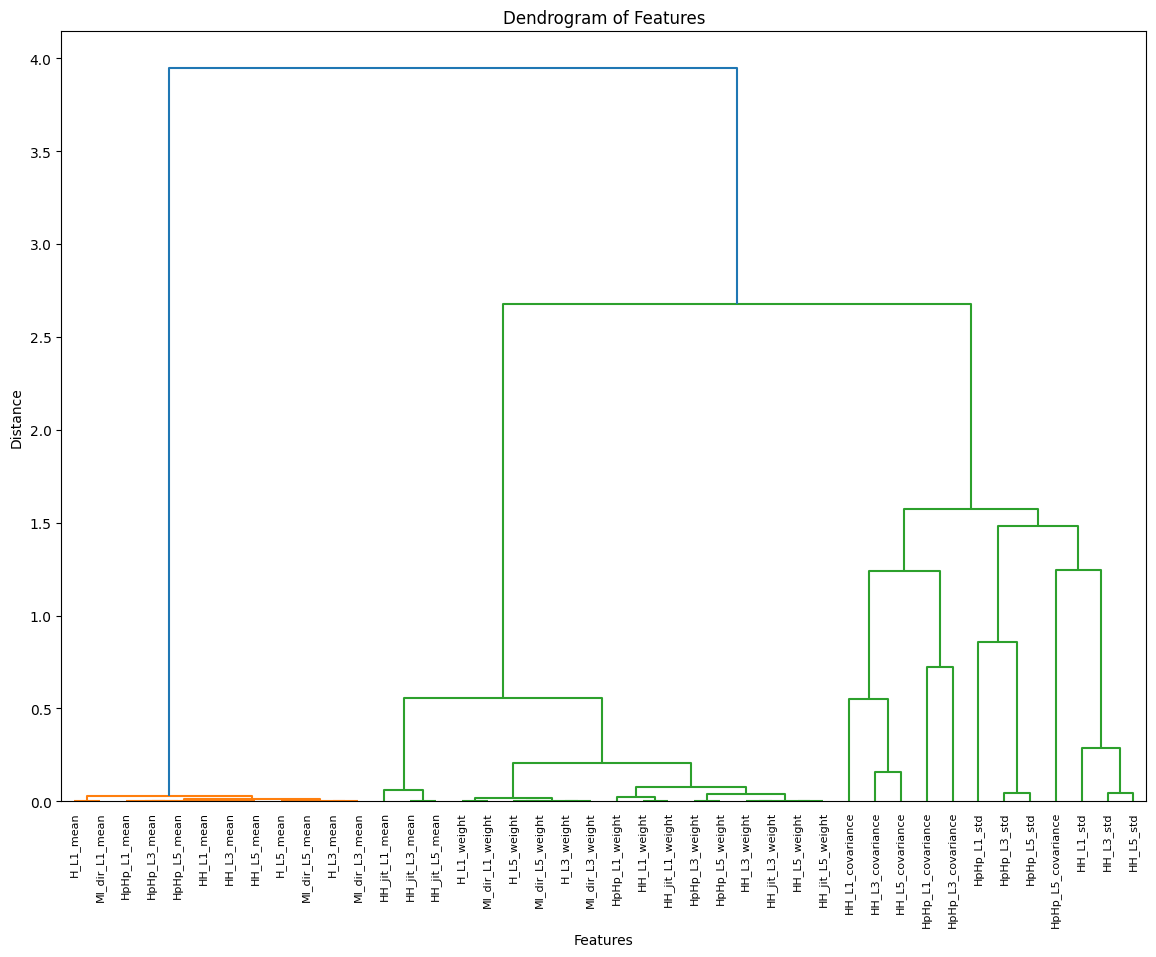

Cluster Summary:
   Cluster                                            Feature
0        1  [HH_L1_mean, HH_L3_mean, HH_L5_mean, H_L1_mean...
1        2  [HH_L1_weight, HH_L3_weight, HH_L5_weight, HH_...
2        3  [HH_L1_covariance, HH_L3_covariance, HH_L5_cov...
3        4                               [HpHp_L1_covariance]
4        5                               [HpHp_L3_covariance]
5        6                         [HpHp_L3_std, HpHp_L5_std]
6        7                                      [HpHp_L1_std]
7        8                  [HH_L1_std, HH_L3_std, HH_L5_std]
8        9                               [HpHp_L5_covariance]


In [ ]:
# Assuming X is your DataFrame of feature columns
correlation_matrix = X.corr()

# Convert correlation matrix to distance matrix
distance_matrix = 1 - correlation_matrix

# Make sure the distance matrix is in condensed form
condensed_distance_matrix = squareform(distance_matrix)

# Create linkage matrix
linkage_matrix = sch.linkage(condensed_distance_matrix, method='ward')

print("Distance Matrix:")
print(distance_matrix)

print("Condensed Distance Matrix:")
print(condensed_distance_matrix)

# Plot dendrogram
plt.figure(figsize=(14, 10))
dendrogram = sch.dendrogram(linkage_matrix, labels=X.columns, leaf_rotation=90)
plt.title('Dendrogram of Features')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

# Generate cluster labels
max_d = 0.7  # Example threshold for distance to form clusters, you can adjust this
cluster_labels = fcluster(linkage_matrix, max_d, criterion='distance')

# Create a DataFrame to hold cluster information
feature_clusters = pd.DataFrame({
    'Feature': X.columns,
    'Cluster': cluster_labels
})

# Summarize clusters
cluster_summary = feature_clusters.groupby('Cluster')['Feature'].apply(list).reset_index()
print("Cluster Summary:")
print(cluster_summary)

               Feature  Cluster
0     HH_L1_covariance        3
1           HH_L1_mean        1
2            HH_L1_std        3
3         HH_L1_weight        2
4     HH_L3_covariance        3
5           HH_L3_mean        1
6            HH_L3_std        3
7         HH_L3_weight        2
8     HH_L5_covariance        3
9           HH_L5_mean        1
10           HH_L5_std        3
11        HH_L5_weight        2
12      HH_jit_L1_mean        2
13    HH_jit_L1_weight        2
14      HH_jit_L3_mean        2
15    HH_jit_L3_weight        2
16      HH_jit_L5_mean        2
17    HH_jit_L5_weight        2
18           H_L1_mean        1
19         H_L1_weight        2
20           H_L3_mean        1
21         H_L3_weight        2
22           H_L5_mean        1
23         H_L5_weight        2
24  HpHp_L1_covariance        3
25        HpHp_L1_mean        1
26         HpHp_L1_std        3
27      HpHp_L1_weight        2
28  HpHp_L3_covariance        3
29        HpHp_L3_mean        1
30      

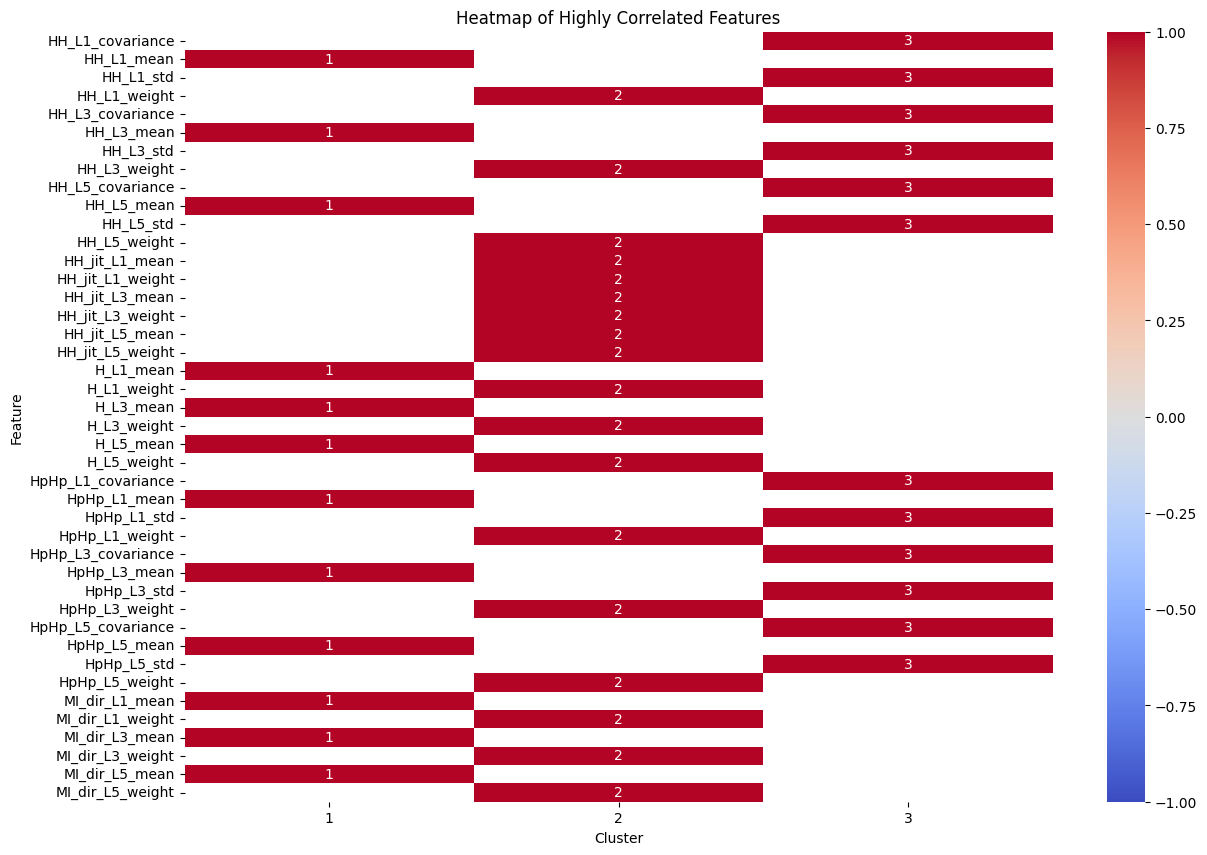

In [ ]:
# Define the maximum distance for clusters
max_distance = 2

# Get cluster labels
cluster_labels = fcluster(linkage_matrix, max_distance, criterion='distance')

# Create a DataFrame with features and their cluster labels
feature_clusters = pd.DataFrame({'Feature': correlation_matrix.columns, 'Cluster': cluster_labels})
print(feature_clusters)

# Create a pivot table for the heatmap
cluster_pivot = feature_clusters.pivot(index='Feature', columns='Cluster', values='Cluster')

plt.figure(figsize=(14, 10))
sns.heatmap(cluster_pivot, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Highly Correlated Features')
plt.show()

In [ ]:
# Create a DataFrame with features and their cluster labels
feature_clusters = pd.DataFrame({'Feature': correlation_matrix.columns, 'Cluster': cluster_labels})

# Select one feature per cluster
selected_features = feature_clusters.groupby('Cluster')['Feature'].first().values

# Create a new DataFrame with selected features
X_selected = X[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.31033809 0.27619234 0.32349492 0.29358874 0.3078577 ]
Mean Cross-Validation Accuracy: 0.30229435738511634
Validation Set Performance:
Accuracy: 0.29143214509068166
Precision: 0.49236561136174634
Recall: 0.47272346201349874
F1-Score: 0.2377280540886204
Test Set Performance:
Accuracy: 0.3023735810113519
Precision: 0.48164782548007906
Recall: 0.4691895663532248
F1-Score: 0.22810793303670454

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.29743991 0.294957   0.30238468 0.27345582 0.29573886]
Mean Cross-Validation Accuracy: 0.2927952525447148
Validation Set Performance:
Accuracy: 0.28549093183239527
Precision: 0.38124914892345835
Recall: 0.43575435060135725
F1-Score: 0.1909284747397563
Test Set Performance:
Accuracy: 0.2928042030209213
Precision: 0.3786040671419273
Recall: 0.44220281315120397
F1-Score: 0.19688126432161104


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.99843658 0.99745895 0.99784988 0.99804535 0.99706802]
Mean Cross-Validation Accuracy: 0.9977717577566875
Validation Set Performance:
Accuracy: 0.9979674796747967
Precision: 0.7450980392156863
Recall: 0.9993217509260708
F1-Score: 0.7933113237461064
Test Set Performance:
Accuracy: 0.0008443568815085843
Precision: 0.09999999999999999
Recall: 0.3333333333333333
F1-Score: 0.15384615384615383

--------------------------------------------------

Training model for target: HpHp_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.99843658 0.99745895 0.99784988 0.99784988 0.99706802]
Mean Cross-Validation Accuracy: 0.9977326647152488
Validation Set Performance:
Accuracy: 0.9979674796747967
Precision: 0.7592592592592592
Recall: 0.999321644750574
F1-Score: 0.8112546797979213
Test Set Performance:
Accuracy: 0.0008443568815085843
Precision: 0.09999999999999999
Recall: 0.3333333333333333
F1-Score: 0.15384615384615383

--------------------------------------------------

Training model for target: HpHp_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99745945 0.99667709 0.99569977 0.99784988 0.99726349]
Mean Cross-Validation Accuracy: 0.9969899351270956
Validation Set Performance:
Accuracy: 0.9974984365228268
Precision: 0.6545454545454547
Recall: 0.9991647089532759
F1-Score: 0.7606929416479362
Test Set Performance:
Accuracy: 0.0037526972511492634
Precision: 0.562531402103941
Recall: 0.40093940817285106
F1-Score: 0.28765024570502207

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.5074835037683335
Average Precision: 0.5070736233099175
Average Recall: 0.6333275237650053
Average F1-Score: 0.43729390847230676


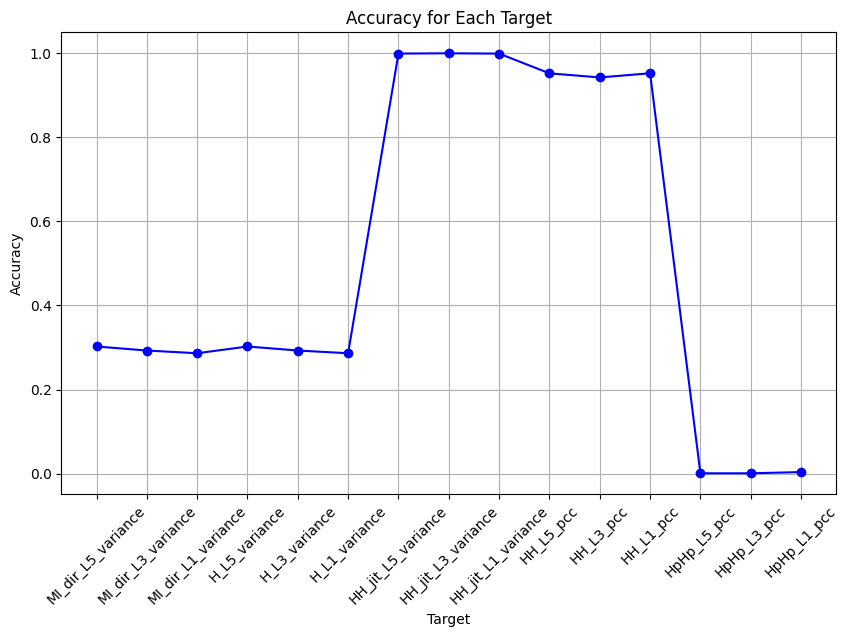

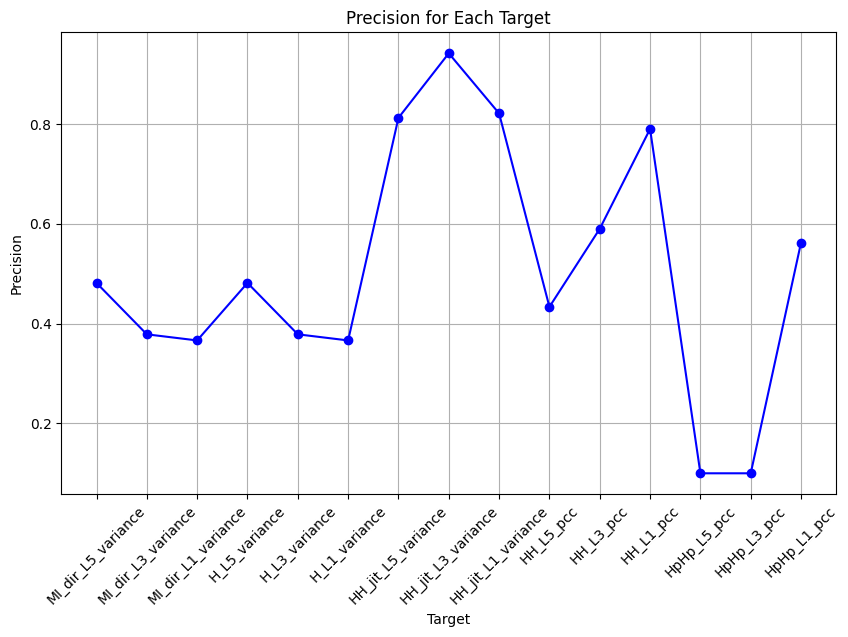

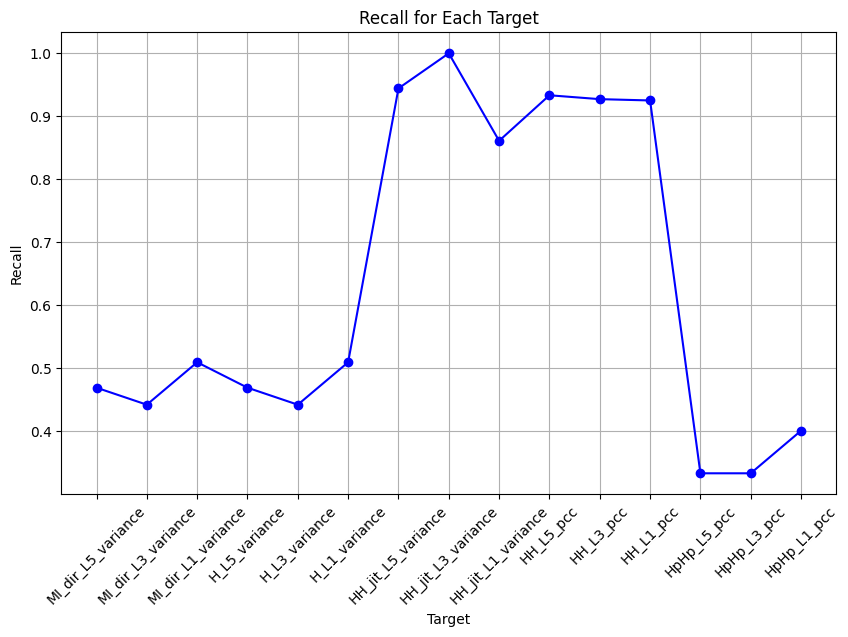

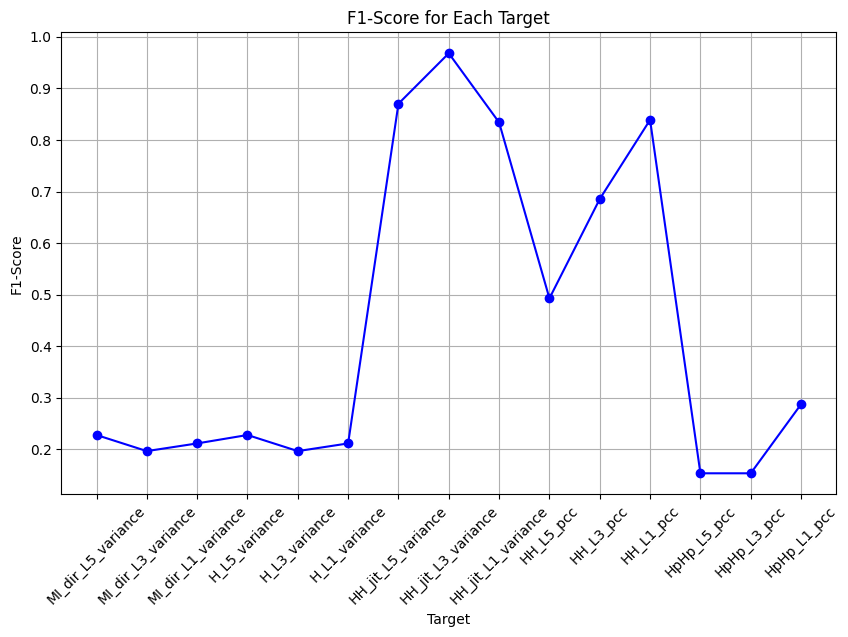

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Initialize the SVM model for classification
    model = SVC(kernel='rbf', class_weight='balanced')

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model on the full training set
    model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = model.predict(X_valid)

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Validation Set Performance:
Accuracy: 0.9762351469668543
Precision: 0.32546260099035706
Recall: 0.33327995729917265
F1-Score: 0.32932489451476793
Test Set Performance:
Accuracy: 0.9766394596115958
Precision: 0.3255464865371986
Recall: 0.3333333333333333
F1-Score: 0.329393896245669

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Validation Set Performance:
Accuracy: 0.9615384615384616
Precision: 0.32051282051282054
Recall: 0.3333333333333333
F1-Score: 0.32679738562091504
Test Set Performance:
Accuracy: 0.9636926540951308
Precision: 0.32123088469837696
Recall: 0.3333333333333333
F1-Score: 0.3271702259806029

--------------------------------------------------

Training model for target: MI_dir_L1_variance
Validation Set Performance:
Accuracy: 0.9255784865540964
Precision: 0.3085261621846988
Recall: 0.3333333333333333
F1-Score: 0.32045036267186316
Test Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precis

Accuracy: 0.9280420302092128
Precision: 0.23203227622443234
Recall: 0.24997472960679268
F1-Score: 0.24066955379300278

--------------------------------------------------

Training model for target: H_L5_variance
Validation Set Performance:
Accuracy: 0.9762351469668543
Precision: 0.32546260099035706
Recall: 0.33327995729917265
F1-Score: 0.32932489451476793
Test Set Performance:
Accuracy: 0.9766394596115958
Precision: 0.3255464865371986
Recall: 0.3333333333333333
F1-Score: 0.329393896245669

--------------------------------------------------

Training model for target: H_L3_variance
Validation Set Performance:
Accuracy: 0.9615384615384616
Precision: 0.32051282051282054
Recall: 0.3333333333333333
F1-Score: 0.32679738562091504
Test Set Performance:
Accuracy: 0.9636926540951308
Precision: 0.32123088469837696
Recall: 0.3333333333333333
F1-Score: 0.3271702259806029

--------------------------------------------------

Training model for target: H_L1_variance
Validation Set Performance:
Accurac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-

Accuracy: 0.2964352720450281
Precision: 0.394516850974197
Recall: 0.24903197993415893
F1-Score: 0.273188517208812
Test Set Performance:
Accuracy: 0.2982456140350877
Precision: 0.38739892653004326
Recall: 0.2134185220027177
F1-Score: 0.25355816085299365

--------------------------------------------------

Training model for target: HH_jit_L3_variance
Validation Set Performance:
Accuracy: 0.2948717948717949
Precision: 0.41613475177304965
Recall: 0.30080675047749367
F1-Score: 0.3058945172047618
Test Set Performance:
Accuracy: 0.29805797917253024
Precision: 0.46480568611716155
Recall: 0.32429888951628083
F1-Score: 0.34614419198257784

--------------------------------------------------

Training model for target: HH_jit_L1_variance
Validation Set Performance:
Accuracy: 0.3162914321450907
Precision: 0.43308507116848727
Recall: 0.24071620486210493
F1-Score: 0.2918511478831246
Test Set Performance:
Accuracy: 0.31991744066047473
Precision: 0.4697076952295447
Recall: 0.26738987198795183
F1-Score

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined 

Accuracy: 0.0009381743127873159
Precision: 0.1363949735201028
Recall: 0.4166666666666667
F1-Score: 0.19361103785014952

--------------------------------------------------

Training model for target: HpHp_L3_pcc
Validation Set Performance:
Accuracy: 0.9984365228267668
Precision: 0.4444444444444444
Recall: 0.6663013984554372
F1-Score: 0.49981726577387947
Test Set Performance:
Accuracy: 0.0009381743127873159
Precision: 0.1304661227114912
Recall: 0.4166666666666667
F1-Score: 0.18756265664160401

--------------------------------------------------

Training model for target: HpHp_L1_pcc
Validation Set Performance:
Accuracy: 0.9982801751094434
Precision: 0.3327600583698145
Recall: 0.3333333333333333
F1-Score: 0.3330464491562997
Test Set Performance:
Accuracy: 0.00046908715639365793
Precision: 0.00015636238546455264
Recall: 0.3333333333333333
F1-Score: 0.000312578144536134

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.6382337304937924

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning

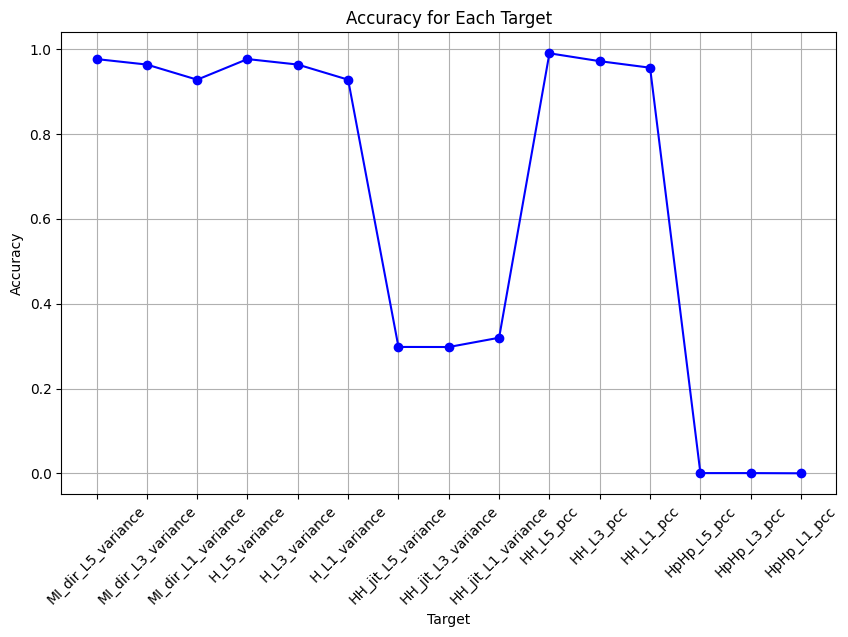

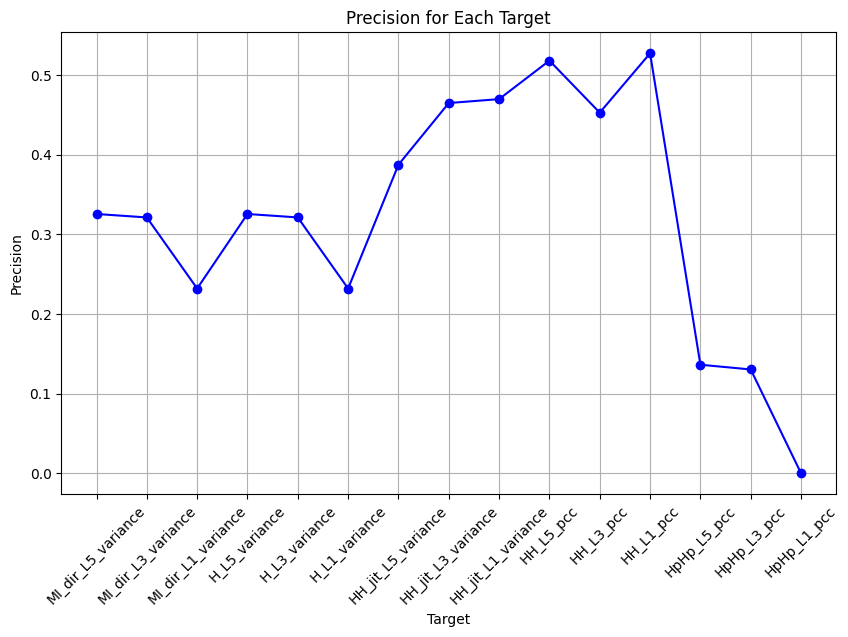

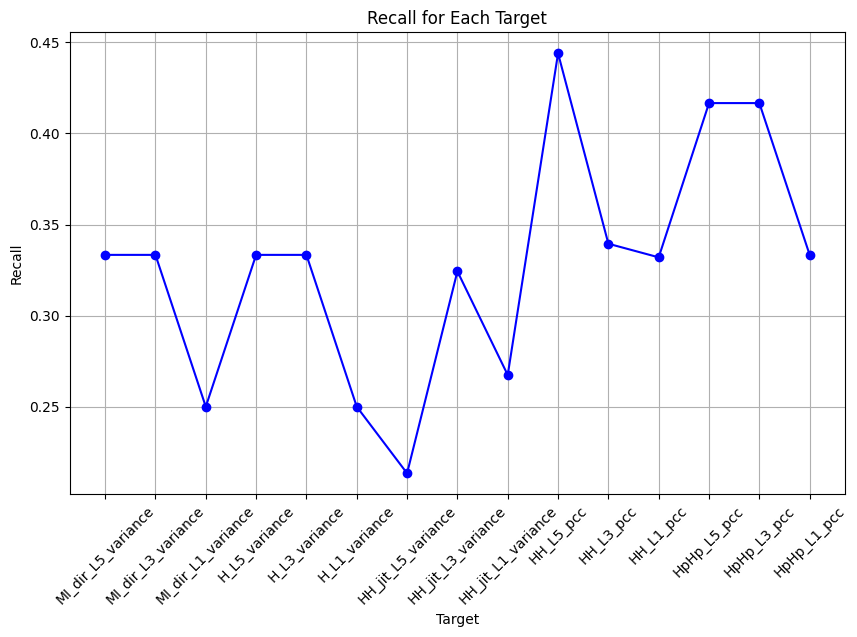

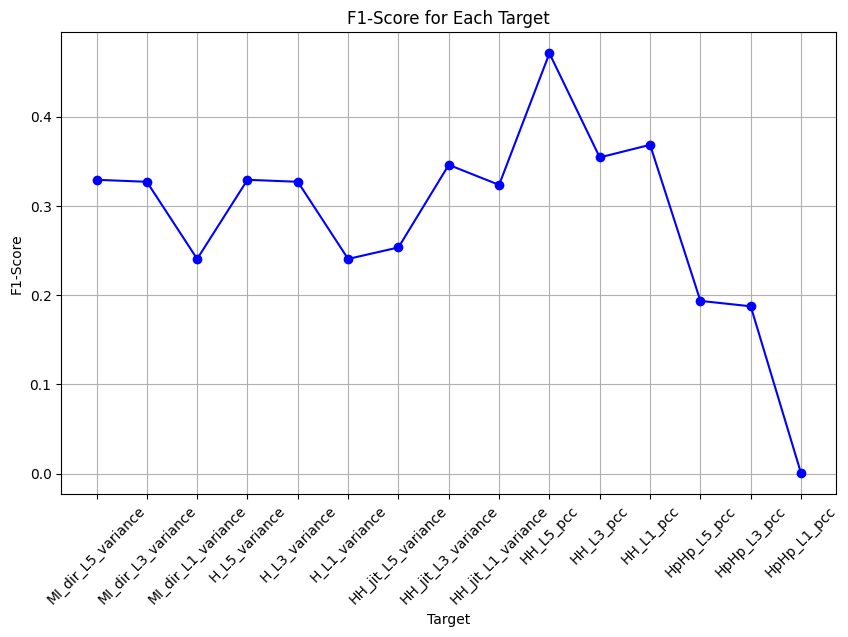

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Train the model
    model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = model.predict(X_valid)

    # Discretize the continuous predictions into bins
    y_valid_pred_binned = np.digitize(y_valid_pred, bins=np.linspace(y_valid_binned[target].min(), y_valid_binned[target].max(), 4)) - 1

    # Predict on the test set
    y_test_pred = model.predict(X_test)
    y_test_pred_binned = np.digitize(y_test_pred, bins=np.linspace(y_test_binned[target].min(), y_test_binned[target].max(), 4)) - 1

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.97674419 0.97654418 0.97732604 0.97869429 0.9775215 ]
Mean Cross-Validation Accuracy: 0.9773660381475354
Validation Set Performance:
Accuracy: 0.9777986241400876
Precision: 0.397977651872836
Recall: 0.3134330720390266
F1-Score: 0.3374851503957509
Test Set Performance:
Accuracy: 0.9778590862182194
Precision: 0.41513921661160924
Recall: 0.3046904824282346
F1-Score: 0.3306315956518289

--------------------------------------------------

Training model for target: MI_dir_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.963846   0.96344801 0.96188428 0.9640344  0.96247068]
Mean Cross-Validation Accuracy: 0.9631366752930604
Validation Set Performance:
Accuracy: 0.9620075046904315
Precision: 0.4268321513002364
Recall: 0.2893089430894309
F1-Score: 0.3112076409511173
Test Set Performance:
Accuracy: 0.9635050192325734
Precision: 0.45025357525357523
Recall: 0.2902047903580001
F1-Score: 0.3140095983688291

--------------------------------------------------

Training model for target: MI_dir_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.92632402 0.92337764 0.92279124 0.92885066 0.92963253]
Mean Cross-Validation Accuracy: 0.9261952179820963
Validation Set Performance:
Accuracy: 0.9222951844903065
Precision: 0.3426707436965071
Recall: 0.28199796724690795
F1-Score: 0.2923450422560673
Test Set Performance:
Accuracy: 0.9246646026831785
Precision: 0.35422237076648844
Recall: 0.2816665251896955
F1-Score: 0.2935824754269072

--------------------------------------------------

Training model for target: H_L5_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.97674419 0.97654418 0.97732604 0.97869429 0.9775215 ]
Mean Cross-Validation Accuracy: 0.9773660381475354
Validation Set Performance:
Accuracy: 0.9777986241400876
Precision: 0.397977651872836
Recall: 0.3134330720390266
F1-Score: 0.3374851503957509
Test Set Performance:
Accuracy: 0.9778590862182194
Precision: 0.41513921661160924
Recall: 0.3046904824282346
F1-Score: 0.3306315956518289

--------------------------------------------------

Training model for target: H_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.963846   0.96344801 0.96188428 0.9640344  0.96247068]
Mean Cross-Validation Accuracy: 0.9631366752930604
Validation Set Performance:
Accuracy: 0.9620075046904315
Precision: 0.4268321513002364
Recall: 0.2893089430894309
F1-Score: 0.3112076409511173
Test Set Performance:
Accuracy: 0.9635050192325734
Precision: 0.45025357525357523
Recall: 0.2902047903580001
F1-Score: 0.3140095983688291

--------------------------------------------------

Training model for target: H_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.92632402 0.92337764 0.92279124 0.92885066 0.92963253]
Mean Cross-Validation Accuracy: 0.9261952179820963
Validation Set Performance:
Accuracy: 0.9222951844903065
Precision: 0.3426707436965071
Recall: 0.28199796724690795
F1-Score: 0.2923450422560673
Test Set Performance:
Accuracy: 0.9246646026831785
Precision: 0.35422237076648844
Recall: 0.2816665251896955
F1-Score: 0.2935824754269072

--------------------------------------------------

Training model for target: HH_jit_L5_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.99960915 0.99980453 0.9994136  1.         0.99980453]
Mean Cross-Validation Accuracy: 0.9997263639896019
Validation Set Performance:
Accuracy: 0.9987492182614134
Precision: 0.5
Recall: 0.475
F1-Score: 0.4868421052631579
Test Set Performance:
Accuracy: 0.9986865559620978
Precision: 0.5
Recall: 0.45833333333333337
F1-Score: 0.4772727272727273

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [1.         1.         0.99980453 0.99980453 0.9994136 ]
Mean Cross-Validation Accuracy: 0.9998045347928068
Validation Set Performance:
Accuracy: 0.9985928705440901
Precision: 0.4772727272727273
Recall: 0.477233530032213
F1-Score: 0.47725312711592605
Test Set Performance:
Accuracy: 0.9986865559620978
Precision: 0.5
Recall: 0.5
F1-Score: 0.5

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.99921829 0.99921814 0.99921814 0.99921814 0.99921814]
Mean Cross-Validation Accuracy: 0.999218169730572
Validation Set Performance:
Accuracy: 0.9973420888055035
Precision: 0.42488222361809047
Recall: 0.4556469110953124
F1-Score: 0.43901256622035334
Test Set Performance:
Accuracy: 0.997560746786753
Precision: 0.4112667687837731
Recall: 0.49974115210843373
F1-Score: 0.44593717513373177

--------------------------------------------------

Training model for target: HH_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.99570061 0.99706802 0.9955043  0.99628616 0.99667709]
Mean Cross-Validation Accuracy: 0.9962472360982868
Validation Set Performance:
Accuracy: 0.9906191369606003
Precision: 0.4835471854304636
Recall: 0.4582542569455427
F1-Score: 0.47013422818791945
Test Set Performance:
Accuracy: 0.9858335678769116
Precision: 0.456959056013648
Recall: 0.30049715909090907
F1-Score: 0.3318530623845388

--------------------------------------------------

Training model for target: HH_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.98925151 0.99257232 0.99179046 0.99120407 0.99276779]
Mean Cross-Validation Accuracy: 0.9915172301988054
Validation Set Performance:
Accuracy: 0.9632582864290181
Precision: 0.4718306310578889
Recall: 0.48905601328479276
F1-Score: 0.4801136625663698
Test Set Performance:
Accuracy: 0.9559058072989961
Precision: 0.46592804149432077
Recall: 0.44258956841505465
F1-Score: 0.4537240333905803

--------------------------------------------------

Training model for target: HH_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.99511432 0.99413604 0.9960907  0.99452697 0.99472244]
Mean Cross-Validation Accuracy: 0.9949180956088821
Validation Set Performance:
Accuracy: 0.9435584740462789
Precision: 0.4304101977201199
Recall: 0.4989631718646317
F1-Score: 0.45930377123912147
Test Set Performance:
Accuracy: 0.9468055164649591
Precision: 0.491129759536283
Recall: 0.4875420540462323
F1-Score: 0.48932735426008966

--------------------------------------------------

Training model for target: HpHp_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.99980457 1.         1.         1.         0.99980453]
Mean Cross-Validation Accuracy: 0.9999218215569587
Validation Set Performance:
Accuracy: 0.99906191369606
Precision: 0.5
Recall: 0.4999217404914697
F1-Score: 0.49996086412022545
Test Set Performance:
Accuracy: 9.381743127873159e-05
Precision: 2.3482998309224122e-05
Recall: 0.0625
F1-Score: 4.6948356807511744e-05

--------------------------------------------------

Training model for target: HpHp_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.99980457 1.         1.         0.99980453 0.99980453]
Mean Cross-Validation Accuracy: 0.9998827285155201
Validation Set Performance:
Accuracy: 0.9989055659787367
Precision: 0.4999608579927979
Recall: 0.49992172824045084
F1-Score: 0.49994129158512723
Test Set Performance:
Accuracy: 9.381743127873159e-05
Precision: 2.3482998309224122e-05
Recall: 0.0625
F1-Score: 4.6948356807511744e-05

--------------------------------------------------

Training model for target: HpHp_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.99902286 0.99921814 0.99921814 0.99921814 0.99863174]
Mean Cross-Validation Accuracy: 0.9990618052046536
Validation Set Performance:
Accuracy: 0.9993746091307066
Precision: 0.49992171598559576
Recall: 0.46875
F1-Score: 0.48329418519678463
Test Set Performance:
Accuracy: 0.0013134440379022423
Precision: 0.2501174591242248
Recall: 0.2502113668388915
F1-Score: 0.0006571844992950825

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.7744691497013478
Average Precision: 0.3676452250808142
Average Recall: 0.3211358819856477
Average F1-Score: 0.30502085150331393


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

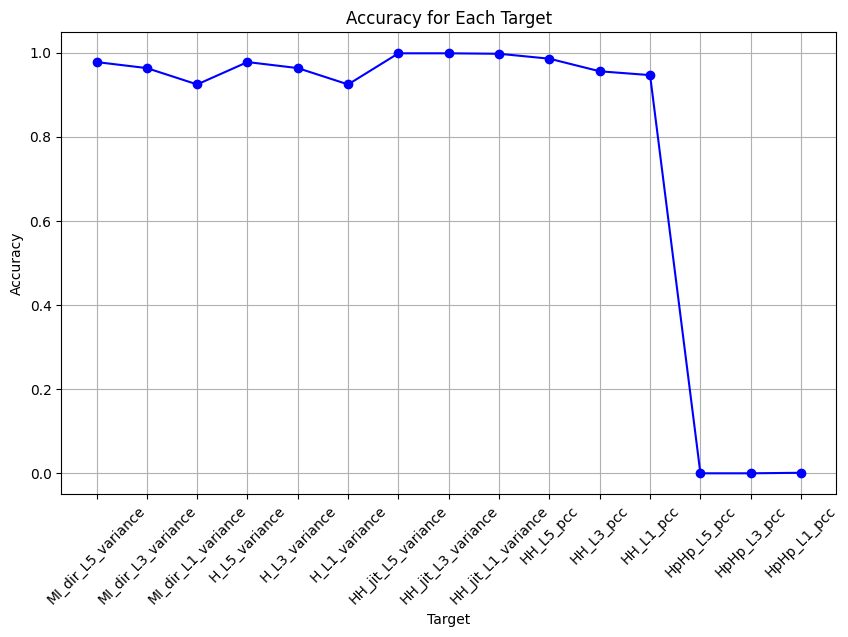

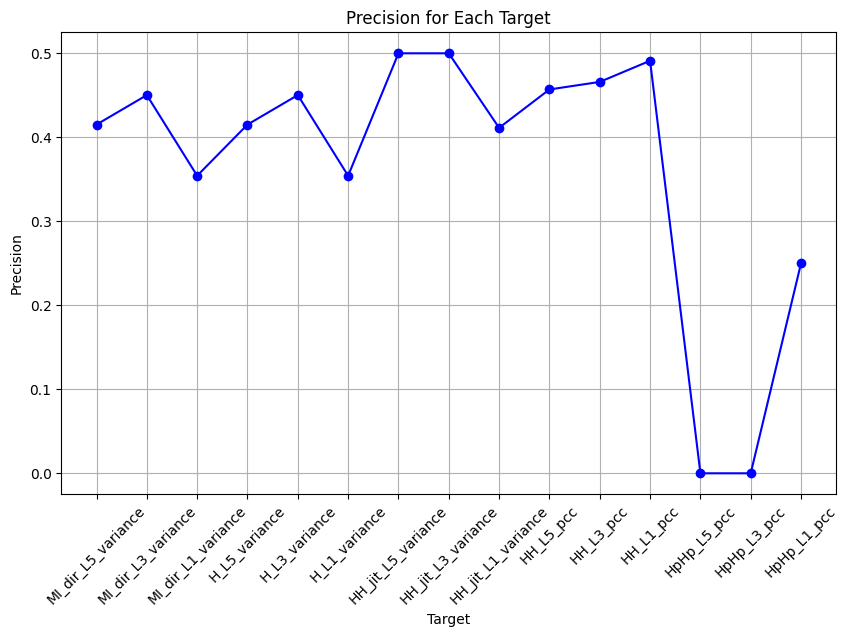

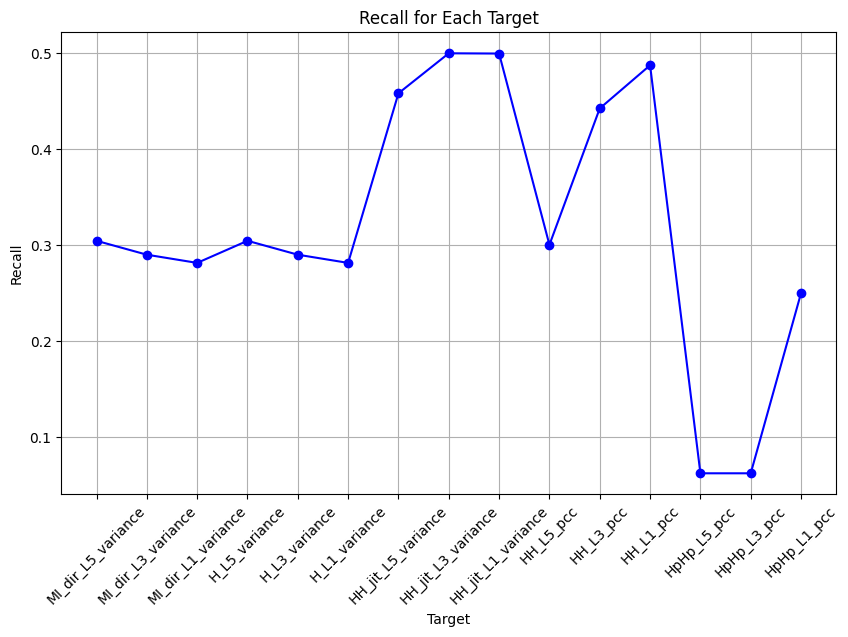

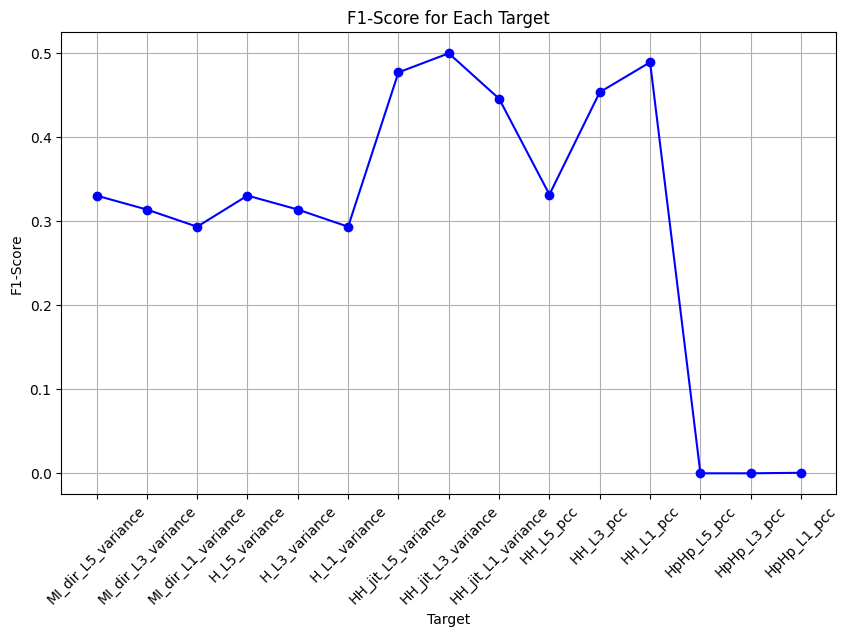

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Perform cross-validation
    cv_scores = cross_val_score(knn_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model
    knn_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = knn_model.predict(X_valid)
    y_valid_pred_binned = np.digitize(y_valid_pred, bins=np.linspace(y_valid_binned[target].min(), y_valid_binned[target].max(), 4)) - 1

    # Predict on the test set
    y_test_pred = knn_model.predict(X_test)
    y_test_pred_binned = np.digitize(y_test_pred, bins=np.linspace(y_test_binned[target].min(), y_test_binned[target].max(), 4)) - 1

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.97478992 0.97556685 0.97478499 0.97458952 0.97576231]
Mean Cross-Validation Accuracy: 0.9750987181424563
Validation Set Performance:
Accuracy: 0.9748280175109444
Precision: 0.32611538260369266
Recall: 0.33279957299172674
F1-Score: 0.3294235747873408
Test Set Performance:
Accuracy: 0.9750445632798574
Precision: 0.3261469905228143
Recall: 0.33278898495036824
F1-Score: 0.32943451248890576

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.96071917 0.96110242 0.96071149 0.96032056 0.95973417]
Mean Cross-Validation Accuracy: 0.9605175637540505
Validation Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: Undefine

Accuracy: 0.958880550343965
Precision: 0.3207803755426539
Recall: 0.3324119241192412
F1-Score: 0.32649258697330247
Test Set Performance:
Accuracy: 0.9616286706069987
Precision: 0.3216594489424465
Recall: 0.33261941848390447
F1-Score: 0.32704763728023994

--------------------------------------------------

Training model for target: MI_dir_L1_variance
Cross-Validation Accuracy Scores: [0.90033223 0.90187647 0.90050821 0.90383112 0.90148554]
Mean Cross-Validation Accuracy: 0.901606711015406
Validation Set Performance:
Accuracy: 0.9040025015634772
Precision: 0.3232337319712237
Recall: 0.332972709331405
F1-Score: 0.3268870089841957
Test Set Performance:
Accuracy: 0.9022422366075616
Precision: 0.3180967102327357
Recall: 0.3303649378381687
F1-Score: 0.32393007555019776

--------------------------------------------------

Training model for target: H_L5_variance
Cross-Validation Accuracy Scores: [0.97478992 0.97556685 0.97478499 0.97458952 0.97576231]
Mean Cross-Validation Accuracy: 0.9750987

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: Undefine

Validation Set Performance:
Accuracy: 0.9748280175109444
Precision: 0.32611538260369266
Recall: 0.33279957299172674
F1-Score: 0.3294235747873408
Test Set Performance:
Accuracy: 0.9750445632798574
Precision: 0.3261469905228143
Recall: 0.33278898495036824
F1-Score: 0.32943451248890576

--------------------------------------------------

Training model for target: H_L3_variance
Cross-Validation Accuracy Scores: [0.96071917 0.96110242 0.96071149 0.96032056 0.95973417]
Mean Cross-Validation Accuracy: 0.9605175637540505
Validation Set Performance:
Accuracy: 0.958880550343965
Precision: 0.3207803755426539
Recall: 0.3324119241192412
F1-Score: 0.32649258697330247
Test Set Performance:
Accuracy: 0.9616286706069987
Precision: 0.3216594489424465
Recall: 0.33261941848390447
F1-Score: 0.32704763728023994

--------------------------------------------------

Training model for target: H_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: Undefine

Cross-Validation Accuracy Scores: [0.90033223 0.90187647 0.90050821 0.90383112 0.90148554]
Mean Cross-Validation Accuracy: 0.901606711015406
Validation Set Performance:
Accuracy: 0.9040025015634772
Precision: 0.3232337319712237
Recall: 0.332972709331405
F1-Score: 0.3268870089841957
Test Set Performance:
Accuracy: 0.9022422366075616
Precision: 0.3180967102327357
Recall: 0.3303649378381687
F1-Score: 0.32393007555019776

--------------------------------------------------

Training model for target: HH_jit_L5_variance
Cross-Validation Accuracy Scores: [0.99921829 0.9994136  0.99902267 0.99843628 0.99824081]
Mean Cross-Validation Accuracy: 0.9988663323576243
Validation Set Performance:
Accuracy: 0.9993746091307066
Precision: 0.8690476190476191
Recall: 0.9189431094588643
F1-Score: 0.8917226287875395
Test Set Performance:
Accuracy: 0.9989680082559339
Precision: 0.8126293995859214
Recall: 0.9441935821051531
F1-Score: 0.8704436273047089

--------------------------------------------------

Train

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Cross-Validation Accuracy Scores: [0.99921829 0.9994136  0.99960907 0.99921814 0.99921814]
Mean Cross-Validation Accuracy: 0.9993354488548878
Validation Set Performance:
Accuracy: 0.9996873045653534
Precision: 0.9280303030303031
Recall: 0.9696447067096173
F1-Score: 0.9474486139323458
Test Set Performance:
Accuracy: 0.9995309128436063
Precision: 0.9171717171717173
Recall: 0.9823306619645292
F1-Score: 0.9477925896183557

--------------------------------------------------

Training model for target: HH_jit_L1_variance
Cross-Validation Accuracy Scores: [0.99648231 0.9960907  0.9949179  0.99784988 0.99452697]
Mean Cross-Validation Accuracy: 0.9959735542488719
Validation Set Performance:
Accuracy: 0.9971857410881801
Precision: 0.716352645627257
Recall: 0.7593853582870914
F1-Score: 0.7137766281694319
Test Set Performance:
Accuracy: 0.9977483816493105
Precision: 0.7235482891485531
Recall: 0.8273385207496654
F1-Score: 0.7411875572878767

--------------------------------------------------

Train

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Cross-Validation Accuracy Scores: [0.97459449 0.9730258  0.97380766 0.97400313 0.97693511]
Mean Cross-Validation Accuracy: 0.9744732371192745
Validation Set Performance:
Accuracy: 0.9803001876172608
Precision: 0.6052048080289415
Recall: 0.7172548405665596
F1-Score: 0.6054151616686988
Test Set Performance:
Accuracy: 0.9666009944647715
Precision: 0.4716958944537381
Recall: 0.6806923400673401
F1-Score: 0.42002318930650634

--------------------------------------------------

Training model for target: HH_L3_pcc
Cross-Validation Accuracy Scores: [0.96892711 0.96305708 0.9646208  0.96696638 0.96383894]
Mean Cross-Validation Accuracy: 0.9654820591436385
Validation Set Performance:
Accuracy: 0.9663852407754847
Precision: 0.7559811308555769
Recall: 0.7011462183983787
F1-Score: 0.7077403177152299
Test Set Performance:
Accuracy: 0.9655690027207056
Precision: 0.727059876507882
Recall: 0.7116779037544041
F1-Score: 0.6864614760475428

--------------------------------------------------

Training mode

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Cross-Validation Accuracy Scores: [0.94000391 0.93881939 0.946638   0.87177482 0.9421423 ]
Mean Cross-Validation Accuracy: 0.9278756839754285
Validation Set Performance:
Accuracy: 0.9496560350218887
Precision: 0.6154532474232801
Recall: 0.7291791744346489
F1-Score: 0.6614456004699907
Test Set Performance:
Accuracy: 0.9432404540763674
Precision: 0.5838594167900081
Recall: 0.6739614337087246
F1-Score: 0.6145998093537685

--------------------------------------------------

Training model for target: HpHp_L5_pcc
Cross-Validation Accuracy Scores: [0.99824116 0.99726349 0.99667709 0.99804535 0.99667709]
Mean Cross-Validation Accuracy: 0.9973808349821374
Validation Set Performance:
Accuracy: 0.9976547842401501
Precision: 0.7368421052631579
Recall: 0.9992174049146971
F1-Score: 0.7822169382283707
Test Set Performance:
Accuracy: 0.0009381743127873159
Precision: 0.4166666666666667
Recall: 0.3333646439977456
F1-Score: 0.13339594878056418

--------------------------------------------------

Trainin

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to s

Cross-Validation Accuracy Scores: [0.99824116 0.99726349 0.99667709 0.99784988 0.99667709]
Mean Cross-Validation Accuracy: 0.9973417419406987
Validation Set Performance:
Accuracy: 0.9976547842401501
Precision: 0.75
Recall: 0.9992172824045085
F1-Score: 0.7996081811770237
Test Set Performance:
Accuracy: 0.9973731119241955
Precision: 0.4144144144144144
Recall: 0.6659152107207715
F1-Score: 0.4633919639766349

--------------------------------------------------

Training model for target: HpHp_L1_pcc
Cross-Validation Accuracy Scores: [0.98846981 0.9870993  0.98592651 0.98885848 0.99061767]
Mean Cross-Validation Accuracy: 0.9881943522358668
Validation Set Performance:
Accuracy: 0.9893683552220137
Precision: 0.4256410256410256
Recall: 0.7605477247019925
F1-Score: 0.47988053955464455
Test Set Performance:
Accuracy: 0.011539544047283985
Precision: 0.5583554376657824
Recall: 0.33690308439016753
F1-Score: 0.2797898133833456

--------------------------------------------------

Overall Performance o

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


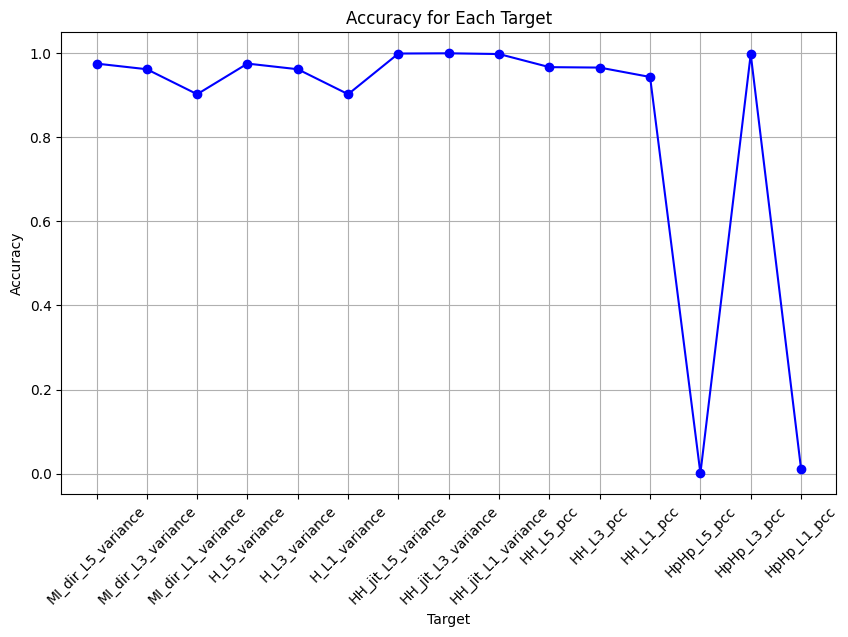

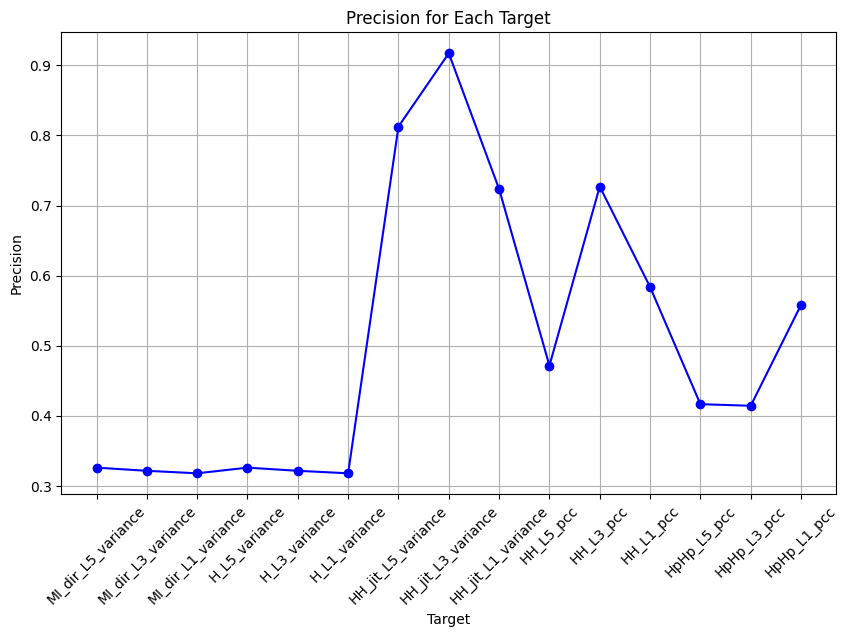

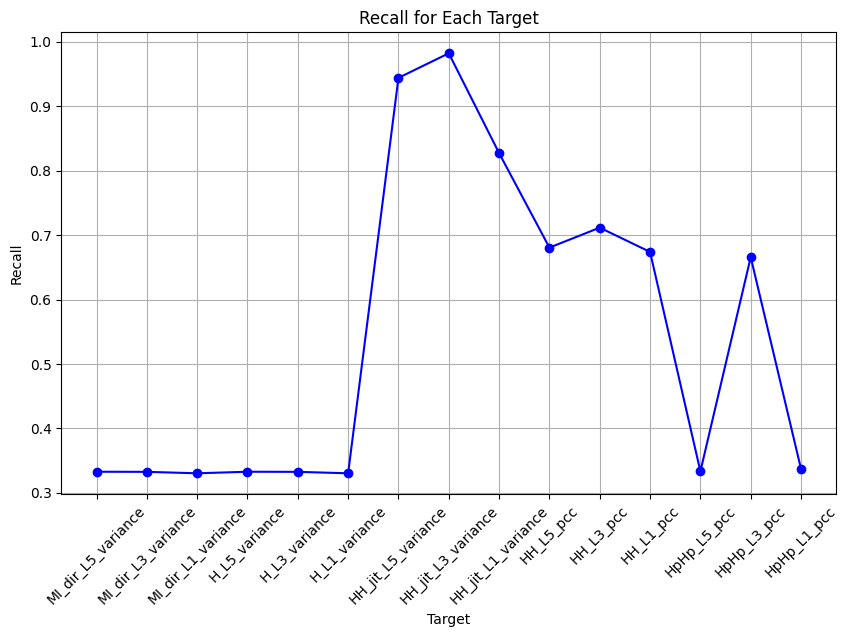

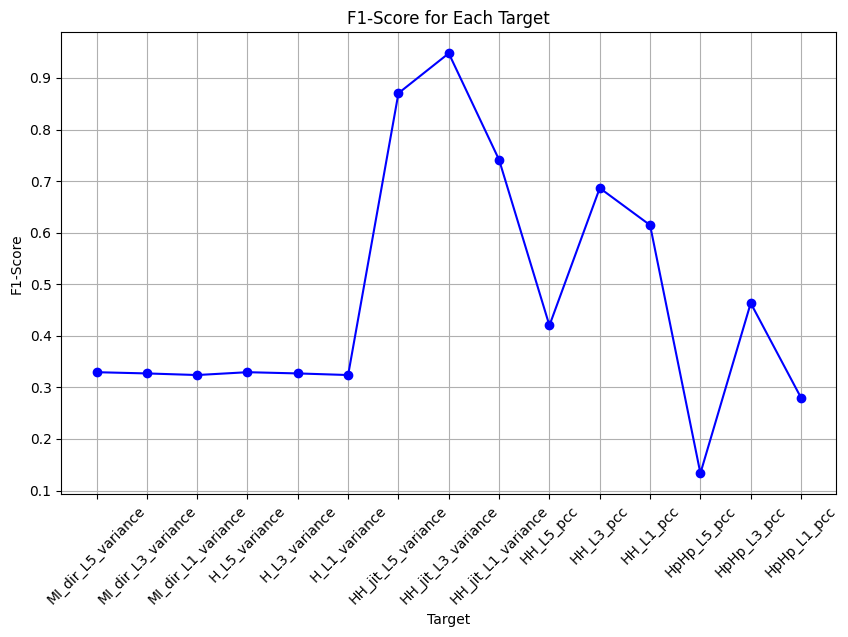

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the Naive Bayes model (Gaussian Naive Bayes for continuous features)
nb_model = GaussianNB()

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Perform cross-validation
    cv_scores = cross_val_score(nb_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model
    nb_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = nb_model.predict(X_valid)
    y_valid_pred_binned = bin_targets(pd.DataFrame(y_valid_pred, columns=[target]))

    # Predict on the test set
    y_test_pred = nb_model.predict(X_test)
    y_test_pred_binned = bin_targets(pd.DataFrame(y_test_pred, columns=[target]))

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned[target])
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned[target])
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.97576705 0.97380766 0.97556685 0.97634871 0.97537138]
Mean Cross-Validation Accuracy: 0.9753723312333461
Validation Set Performance:
Accuracy: 0.9779549718574109
Precision: 0.6671144056209486
Recall: 0.5056202385880081
F1-Score: 0.5591101305572903
Test Set Performance:
Accuracy: 0.9772023641992682
Precision: 0.6203158487980781
Recall: 0.4723202644634466
F1-Score: 0.5192796105139275

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.96111003 0.95973417 0.96129789 0.96305708 0.96325254]
Mean Cross-Validation Accuracy: 0.9616903397175369
Validation Set Performance:
Accuracy: 0.9595059412132583
Precision: 0.5899923857150379
Recall: 0.45230540437635786
F1-Score: 0.4941730790910918
Test Set Performance:
Accuracy: 0.9628482972136223
Precision: 0.614254074106807
Recall: 0.4597192306267279
F1-Score: 0.5059366526479351

----------

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.0009381743127873159
Precision: 0.2500313077236154
Recall: 0.4166666666666667
F1-Score: 0.2857768776461857

--------------------------------------------------

Training model for target: HpHp_L3_pcc
Cross-Validation Accuracy Scores: [1.         1.         1.         1.         0.99980453]
Mean Cross-Validation Accuracy: 0.9999609069585613
Validation Set Performance:
Accuracy: 0.9996873045653534
Precision: 0.9047619047619048
Recall: 0.9998956376539345
F1-Score: 0.9443922551015081
Test Set Performance:
Accuracy: 0.0009381743127873159
Precision: 0.2500313077236154
Recall: 0.4166666666666667
F1-Score: 0.2857768776461857

--------------------------------------------------

Training model for target: HpHp_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [1.         1.         0.99960907 1.         0.99980453]
Mean Cross-Validation Accuracy: 0.9998827208756842
Validation Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Test Set Performance:
Accuracy: 0.0020639834881320948
Precision: 0.6668232788322997
Recall: 0.5929057286502096
F1-Score: 0.2926054282450702

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.781023860900022
Average Precision: 0.6848530187653242
Average Recall: 0.6564979126502823
Average F1-Score: 0.6222404196298346


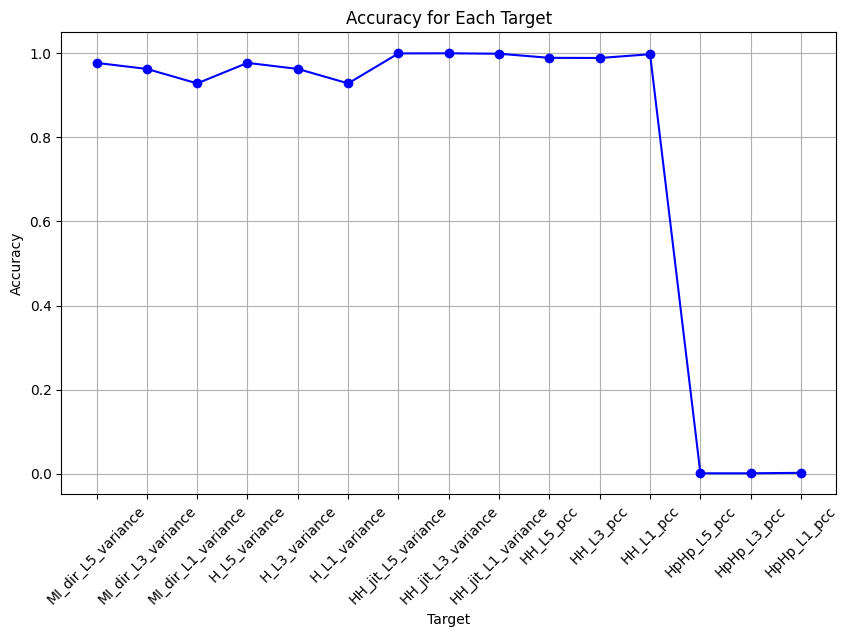

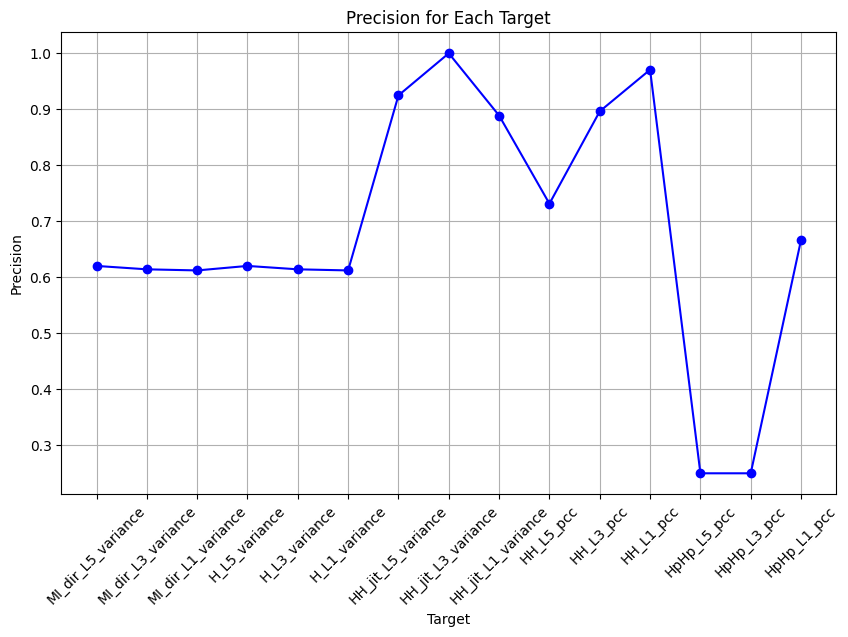

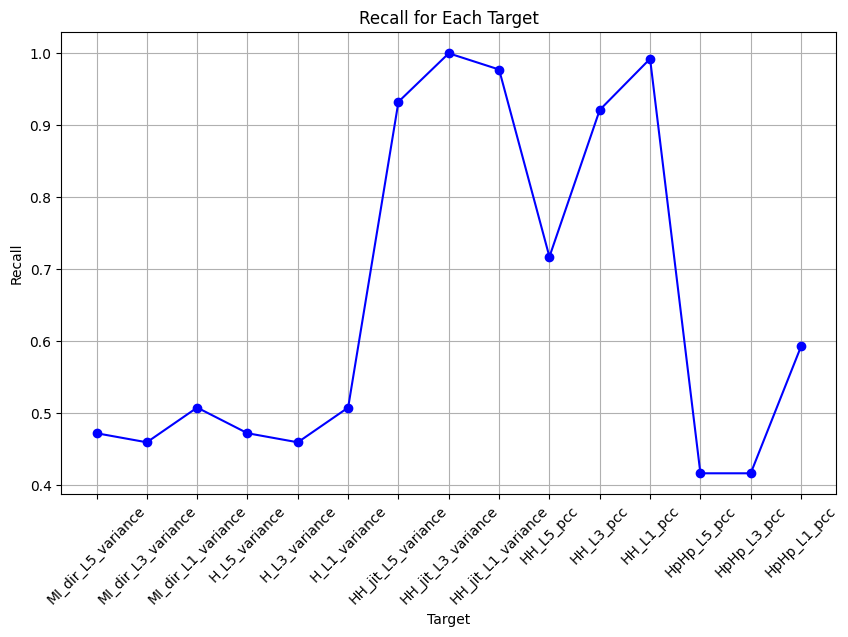

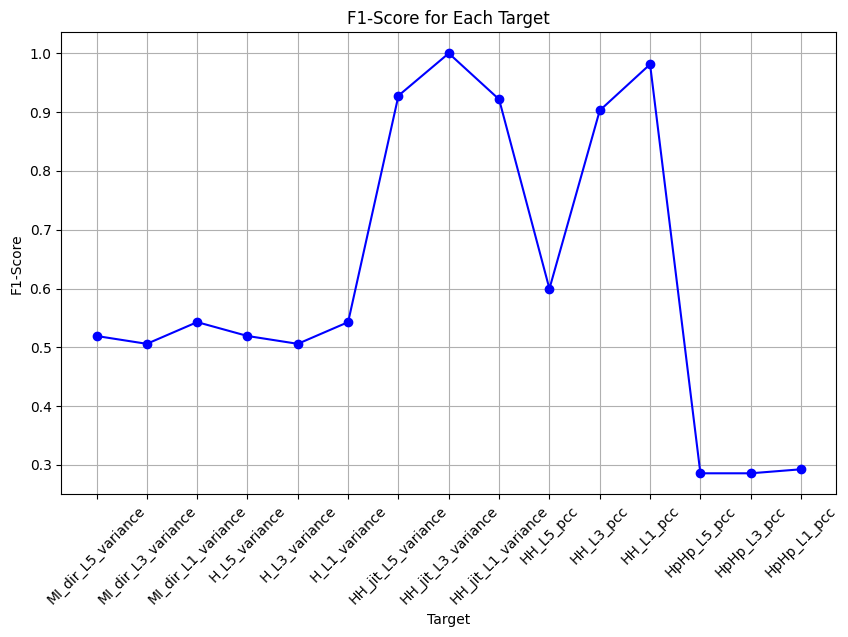

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Ensure target_columns is defined and not empty
if 'target_columns' in locals() and target_columns:
    # Train and evaluate the model for each target column
    for target in target_columns:
        print(f"Training model for target: {target}")

        # Initialize the Random Forest model
        rf_model = DecisionTreeClassifier(random_state=42)

        # Perform cross-validation
        cv_scores = cross_val_score(rf_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
        print(f"Cross-Validation Accuracy Scores: {cv_scores}")
        print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

        # Train the model on the full training set
        rf_model.fit(X_train, y_train_binned[target])

        # Predict on the validation set
        y_valid_pred = rf_model.predict(X_valid)

        # Predict on the test set
        y_test_pred = rf_model.predict(X_test)

        # Generate classification performance metrics
        def generate_classification_metrics(y_true, y_pred):
            accuracy = accuracy_score(y_true, y_pred)
            precision = precision_score(y_true, y_pred, average='macro')
            recall = recall_score(y_true, y_pred, average='macro')
            f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
            return accuracy, precision, recall, f1

        print("Validation Set Performance:")
        val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
        print(f"Accuracy: {val_accuracy}")
        print(f"Precision: {val_precision}")
        print(f"Recall: {val_recall}")
        print(f"F1-Score: {val_f1}")

        print("Test Set Performance:")
        test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
        print(f"Accuracy: {test_accuracy}")
        print(f"Precision: {test_precision}")
        print(f"Recall: {test_recall}")
        print(f"F1-Score: {test_f1}")

        print("\n" + "-"*50 + "\n")

        # Append metrics to overall lists
        overall_accuracy.append(test_accuracy)
        overall_precision.append(test_precision)
        overall_recall.append(test_recall)
        overall_f1.append(test_f1)

    # Calculate the overall performance metrics
    avg_accuracy = np.mean(overall_accuracy)
    avg_precision = np.mean(overall_precision)
    avg_recall = np.mean(overall_recall)
    avg_f1 = np.mean(overall_f1)

    print("Overall Performance on Test Set:")
    print(f"Average Accuracy: {avg_accuracy}")
    print(f"Average Precision: {avg_precision}")
    print(f"Average Recall: {avg_recall}")
    print(f"Average F1-Score: {avg_f1}")

    # Define the plot_metrics function
    def plot_metrics(metrics, metric_name):
        plt.figure(figsize=(10, 6))
        plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
        plt.title(f'{metric_name} for Each Target')
        plt.xlabel('Target')
        plt.ylabel(metric_name)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

    # Plotting
    plot_metrics(overall_accuracy, 'Accuracy')
    plot_metrics(overall_precision, 'Precision')
    plot_metrics(overall_recall, 'Recall')
    plot_metrics(overall_f1, 'F1-Score')
else:
    print("Error: target_columns is not defined or is empty.")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.97791675 0.97673964 0.97830336 0.97986708 0.97908522]
Mean Cross-Validation Accuracy: 0.9783824113859227
Validation Set Performance:
Accuracy: 0.981863664790494
Precision: 0.8671087051994425
Recall: 0.49930945352584993
F1-Score: 0.5816556972983746
Test Set Performance:
Accuracy: 0.9806736091565813
Precision: 0.7681064012711616
Recall: 0.47350502270872363
F1-Score: 0.5432026951842136

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.96638655 0.96579359 0.96657545 0.96813917 0.96833464]
Mean Cross-Validation Accuracy: 0.9670458801190531
Validation Set Performance:
Accuracy: 0.965603502188868
Precision: 0.7321079099856931
Recall: 0.43874442876660175
F1-Score: 0.4961646428725528
Test Set Performance:
Accuracy: 0.9672577164837227
Precision: 0.7320254464991307
Recall: 0.4522991976015165
F1-Score: 0.5132765001219415

---------

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         1.         1.         1.         0.99980453]
Mean Cross-Validation Accuracy: 0.9999609069585613
Validation Set Performance:
Accuracy: 0.9996873045653534
Precision: 0.8888888888888888
Recall: 0.9998956539886263
F1-Score: 0.9332811521603007
Test Set Performance:
Accuracy: 0.0009381743127873159
Precision: 0.2500313077236154
Recall: 0.4166666666666667
F1-Score: 0.2857768776461857

--------------------------------------------------

Training model for target: HpHp_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         1.         1.         0.99980453 1.        ]
Mean Cross-Validation Accuracy: 0.9999609069585613
Validation Set Performance:
Accuracy: 0.9996873045653534
Precision: 0.9047619047619048
Recall: 0.9998956376539345
F1-Score: 0.9443922551015081
Test Set Performance:
Accuracy: 0.0009381743127873159
Precision: 0.2500313077236154
Recall: 0.4166666666666667
F1-Score: 0.2857768776461857

--------------------------------------------------

Training model for target: HpHp_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [1.         0.99980453 0.99960907 1.         0.99980453]
Mean Cross-Validation Accuracy: 0.9998436278342455
Validation Set Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Test Set Performance:
Accuracy: 0.0020639834881320948
Precision: 0.6668232788322997
Recall: 0.5929057286502096
F1-Score: 0.2926054282450702

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.7836945304437565
Average Precision: 0.7433022598267629
Average Recall: 0.6522760340462441
Average F1-Score: 0.6298434639910238


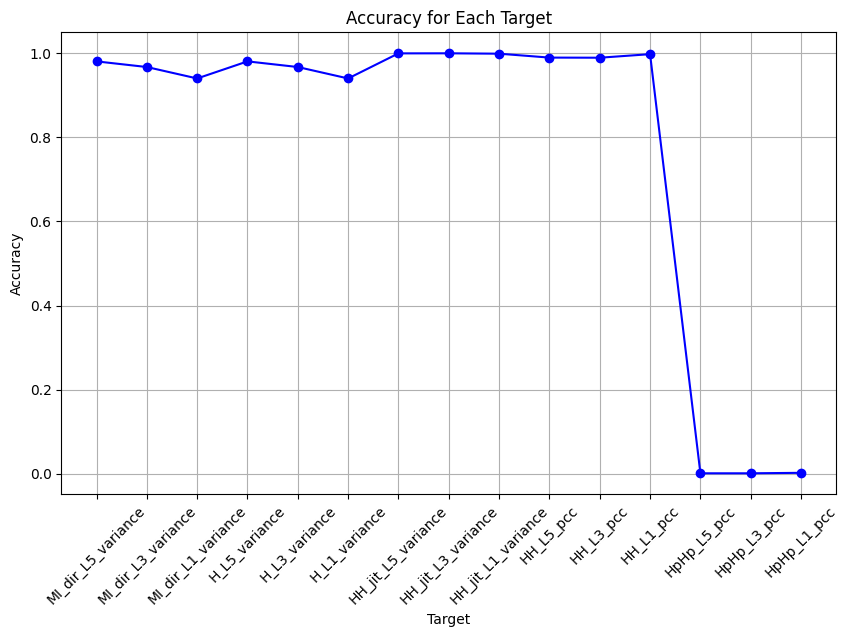

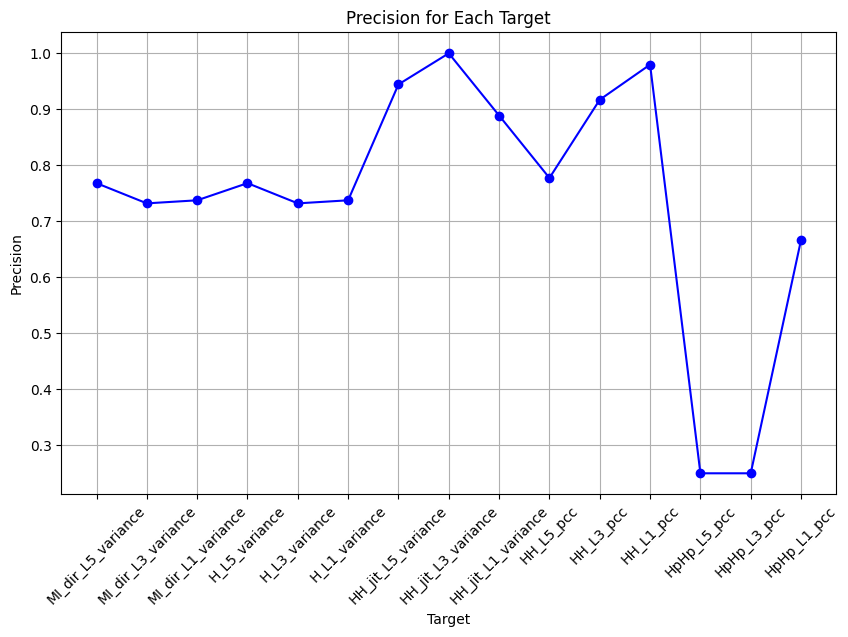

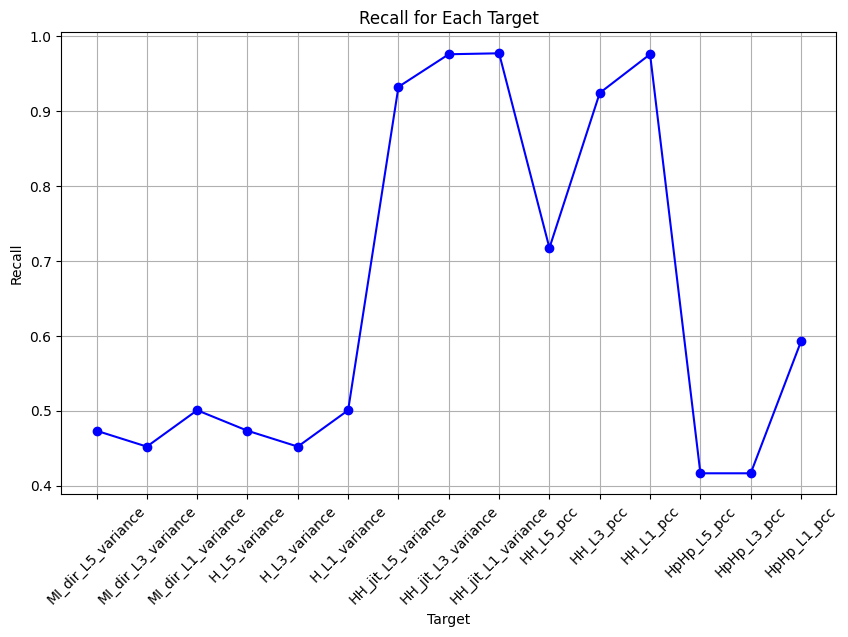

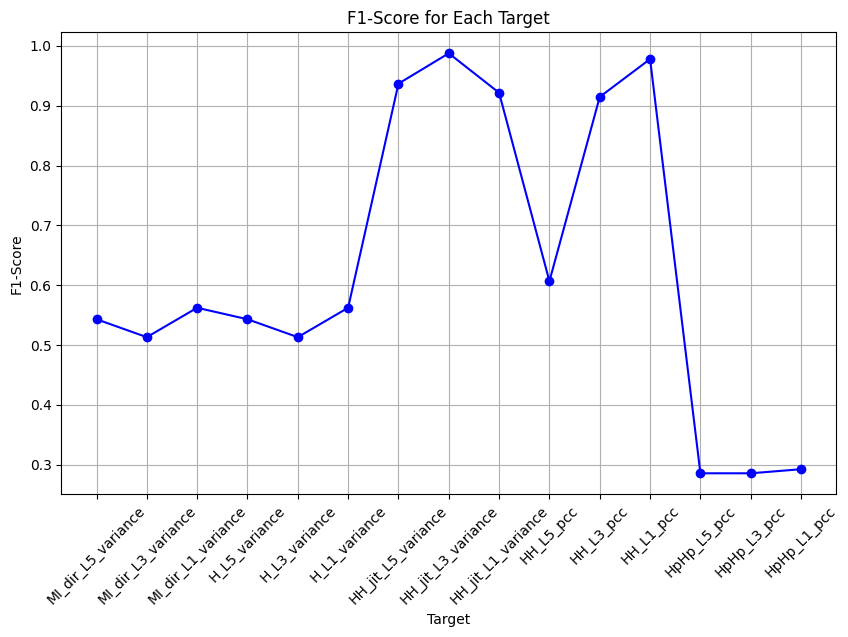

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(random_state=42)

    # Perform cross-validation
    cv_scores = cross_val_score(rf_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model on the full training set
    rf_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = rf_model.predict(X_valid)

    # Predict on the test set
    y_test_pred = rf_model.predict(X_test)

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

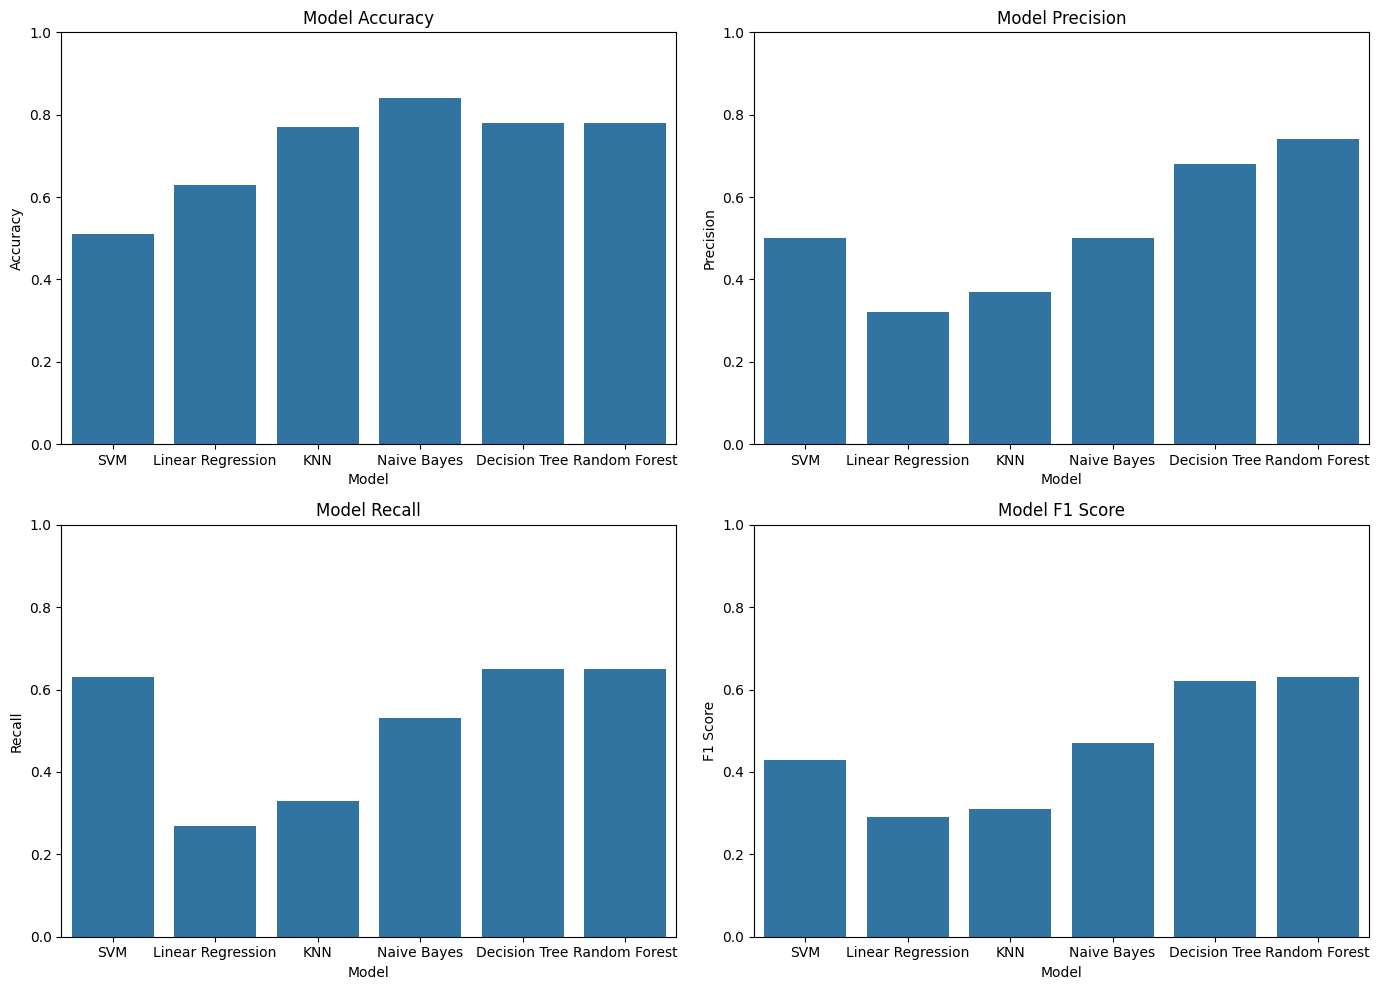

In [ ]:
data = {
    'Model': ['SVM', 'Linear Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.51, 0.63, 0.77, 0.84, 0.78, 0.78],
    'Precision': [0.50, 0.32, 0.37,0.50 ,0.68, 0.74],
    'Recall': [0.63, 0.27, 0.33, 0.53, 0.65, 0.65],
    'F1 Score': [0.43, 0.29, 0.31, 0.47, 0.62, 0.63]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(14, 10))

# Plot Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df)
plt.title('Model Accuracy')
plt.ylim(0, 1)

# Plot Precision
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=df)
plt.title('Model Precision')
plt.ylim(0, 1)

# Plot Recall
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=df)
plt.title('Model Recall')
plt.ylim(0, 1)

# Plot F1 Score
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1 Score', data=df)
plt.title('Model F1 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()